<a href="https://colab.research.google.com/github/Anacatlisboa23/Application-of-Machine-Learning-Methodologies-in-the-Search-for-New-Peptides-with-Antimicrobial-Pote/blob/main/ESKAPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset ESKAPE

Criação do ESKAPE DATASET e análises de homologia utilizando
CD-HIT e CD-HIT-2D


In [ ]:
! pip install biopython

In [ ]:
!apt-get install cd-hit

In [ ]:
#import
import pandas as pd
from Bio.Blast import NCBIWWW, NCBIXML
from Bio import SeqIO
import pandas as pd
import csv
from google.colab import files
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


In [ ]:
eskape = pd.read_csv("/content/eskape_bacteria_final.csv")

In [ ]:
eskape

,Unnamed: 0,Sequence,Name,Target_Organism,Function
0,4,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Staphylococcus aureus,antibacterian group ESKAPE
1,16,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Enterococcus faecium,antibacterian group ESKAPE
2,48,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,Aureocin A53 (Bacteriocin),Staphylococcus aureus,antibacterian group ESKAPE
3,62,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,Enterocin P (Pediocin-like peptide; Bacteriocin),Enterococcus faecium,antibacterian group ESKAPE
4,92,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE
...,...,...,...,...,...
3619,19858,KLLNLLPGLLAGIF,Reverse Pxt‐5,Staphylococcus aureus,antibacterian group ESKAPE
3620,19862,ALLKLAPRLLAGIF,Reverse Pxt-2,Pseudomonas aeruginosa,antibacterian group ESKAPE
3621,19863,ALLKLAPRLLAGIF,Reverse Pxt-2,Staphylococcus aureus,antibacterian group ESKAPE
3622,19867,LLNSGVKLGTKLLSGLLN,Reverse Pxt-12,Pseudomonas aeruginosa,antibacterian group ESKAPE


In [ ]:
non_amp = pd.read_csv("/content/uniprotkb_non_antimicrobial_peptides_ESTE.csv", encoding="utf-8",delimiter=';')

In [ ]:
non_amp

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Target_Organism,Length,Sequence
0,A0A0A1I6E7,reviewed,NDB4S_ANDCR,Antimicrobial peptide AcrAP1,NaN,Androctonus crassicauda (Arabian fat-tailed sc...,74,MEIKYLLTVFLVLLIVSDHCQAFLFSLIPHAISGLISAFKGRRKRD...
1,A0A0A1I6N9,reviewed,NDB4T_ANDCR,Antimicrobial peptide AcrAP2,NaN,Androctonus crassicauda (Arabian fat-tailed sc...,74,MEIKYLLTVFLVLLIVSDHCQAFLFSLIPNAISGLLSAFKGRRKRN...
2,A0A0H3GDH9,reviewed,PGDA_LISM4,Peptidoglycan-N-acetylglucosamine deacetylase ...,pgdA LMRG_00107,Listeria monocytogenes serotype 1/2a (strain 1...,466,MKIRWIRLSLVAILIIAVVFIGVIGFQKYQFSKSRNKVIMQMDRLM...
3,A0A5S8KLN1,unreviewed,A0A5S8KLN1_PIG,Clusterin,CLU,Sus scrofa (Pig),447,EMKTLLLLVGLLLTWENGPWVLGDKAISDKELQEMSTEGSKYVNKE...
4,B5LUQ7,reviewed,FALX3_LITFA,Preprofallaxidin-3 [Cleaved into: Fallaxidin-1...,NaN,Litoria fallax (Eastern dwarf tree frog) (Hylo...,123,MASLKKSLFLVLFLGLVSLSICEEKKRENEDDAEDENHEEESEEKR...
...,...,...,...,...,...,...,...,...
1982,Q9X476,unreviewed,Q9X476_ENTFC,Bacteriocin (Blp family class II bacteriocin) ...,B1P95_03170 B4W81_06865 CUN04_07155 KYX88_02295,Enterococcus faecium (Streptococcus faecium),71,MHIKNTKTTFILSSEELKNIQGGSAVGVLGTTFSGATAGVKLCSAG...
1983,Q9XFF2,unreviewed,Q9XFF2_ORYRU,Lectin,NaN,Oryza rufipogon (Brownbeard rice) (Asian wild ...,200,AQTCGKQNNGMICPHNLCCSQFGYCGLGRDYCGTGCQSGACCSSQR...
1984,Q9ZP51,unreviewed,Q9ZP51_URTDI,Agglutinin isolectin IV,chia5.4.1,Urtica dioica (Great nettle) (Stinging nettle),112,MMMRFLAAVVIMSSAMAVGLVSAQRCGSLGGGGTCPGLRCCSIWGW...
1985,S8C712,unreviewed,S8C712_9LAMI,Chitin-binding type-1 domain-containing protein,M569_12215,Genlisea aurea,71,DCNCGTRCCSQWGYCGDTEHYCGLGCRNGSCWKDPPQPPSAQLSAS...


In [ ]:
eskape_non_amp = non_amp[non_amp['Target_Organism'].str.contains(r'Enterococcus faecium|Staphylococcus aureus|Klebsiella pneumoniae|Acinetobacter baumannii|Pseudomonas aeruginosa|Enterobacter spp.')]

In [ ]:
eskape_non_amp

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Target_Organism,Length,Sequence
129,A0A132Z702,unreviewed,A0A132Z702_ENTFC,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF B4W81_13430 CUN04_00270 GBM44_05555 GBM73...,Enterococcus faecium (Streptococcus faecium),863,MLKNTIQWLKNHLGLFKTIFLISVIVIIVGELMSIGKTLSIQQLGE...
130,A0A133CH35,unreviewed,A0A133CH35_ENTFC,ATP-dependent Clp protease proteolytic subunit...,clpP A5810_000386 AWT83_05460 B1P95_10385 B4W8...,Enterococcus faecium (Streptococcus faecium),197,MNLIPTVIEQSSRGERAYDIYSRLLKDRIIMLSGQVTDDLANSIIA...
131,A0A133CIA7,unreviewed,A0A133CIA7_ENTFC,Methionine aminopeptidase (MAP) (MetAP) (EC 3....,map AWT83_15105 B1P95_09725 B4W81_15170 CQR37_...,Enterococcus faecium (Streptococcus faecium),254,MITLKSAREIEMMAESGALLADVHKNLRDFIKPGITSWDIEVFVRN...
322,A0A132ZEU6,unreviewed,A0A132ZEU6_ENTFC,Oligopeptidase F (EC 3.4.24.-),pepF B4W81_06590 CUN04_00670 EB12_02036 GBM44_...,Enterococcus faecium (Streptococcus faecium),602,MEVKQLPKREELPENLTWDLTKIFSSDQEFDEKYLELSEELKQSEK...
323,A0A133CPX7,unreviewed,A0A133CPX7_ENTFC,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF B4W81_05555 CUN04_03520 GBM73_10940 KYX88...,Enterococcus faecium (Streptococcus faecium),857,MKNKRYLMLQWIKEHSLILKLIFFGSVLVFVANQVANIANGMSWQD...
644,A0A6B0B298,unreviewed,A0A6B0B298_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_03750 GO941_15135,Staphylococcus aureus,600,MNQEVKNKIFSILKITFATALFIFVAITLYRELSGINFKDTLVEFS...
645,A0A6B0BC97,unreviewed,A0A6B0BC97_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_09610 GO941_09350,Staphylococcus aureus,600,MNQEVKNKIFSILKITFATALFIFVVITLYRELSGINFKDTLVEFS...
1981,Q9X472,unreviewed,Q9X472_ENTFC,Bacteriocin-type signal sequence (EntF) (EntF ...,entF B1P95_01640 B4W81_06845 CQR37_11575 CUN04...,Enterococcus faecium (Streptococcus faecium),48,MEEKNRLNAKQCSDQELKKIKGGAGTKPQGKPASNLVECVFSLFKKCN
1982,Q9X476,unreviewed,Q9X476_ENTFC,Bacteriocin (Blp family class II bacteriocin) ...,B1P95_03170 B4W81_06865 CUN04_07155 KYX88_02295,Enterococcus faecium (Streptococcus faecium),71,MHIKNTKTTFILSSEELKNIQGGSAVGVLGTTFSGATAGVKLCSAG...


In [ ]:
len(eskape_non_amp)

9

In [ ]:
non_amp.rename(columns={'Target_Organism\t': 'Target_Organism'}, inplace=True)

In [ ]:
common_organisms = pd.merge(eskape, non_amp, on='Target_Organism', suffixes=('sequence', 'sequence'))

In [ ]:
common_organisms

,Unnamed: 0,Sequencesequence,Name,Target_Organism,Function,Entry,Reviewed,Entry Name,Protein names,Gene Names,Length,Sequencesequence
0,92,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0B298,unreviewed,A0A6B0B298_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_03750 GO941_15135,600,MNQEVKNKIFSILKITFATALFIFVAITLYRELSGINFKDTLVEFS...
1,92,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0BC97,unreviewed,A0A6B0BC97_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_09610 GO941_09350,600,MNQEVKNKIFSILKITFATALFIFVVITLYRELSGINFKDTLVEFS...
2,157,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0B298,unreviewed,A0A6B0B298_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_03750 GO941_15135,600,MNQEVKNKIFSILKITFATALFIFVAITLYRELSGINFKDTLVEFS...
3,157,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0BC97,unreviewed,A0A6B0BC97_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_09610 GO941_09350,600,MNQEVKNKIFSILKITFATALFIFVVITLYRELSGINFKDTLVEFS...
4,318,SCNCVCGVCCSCSP,Amythiamicin A/B (Bacteriocin),Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0B298,unreviewed,A0A6B0B298_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_03750 GO941_15135,600,MNQEVKNKIFSILKITFATALFIFVAITLYRELSGINFKDTLVEFS...
...,...,...,...,...,...,...,...,...,...,...,...,...
2683,19817,GLLKKLLKIAAKVGKKLL,"XT-7 [G4K,P5K,S15K,N16K]",Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0BC97,unreviewed,A0A6B0BC97_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_09610 GO941_09350,600,MNQEVKNKIFSILKITFATALFIFVVITLYRELSGINFKDTLVEFS...
2684,19832,GLKEVAHSAKKFAKGFISGLTGS,Pxt‐3,Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0B298,unreviewed,A0A6B0B298_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_03750 GO941_15135,600,MNQEVKNKIFSILKITFATALFIFVAITLYRELSGINFKDTLVEFS...
2685,19832,GLKEVAHSAKKFAKGFISGLTGS,Pxt‐3,Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0BC97,unreviewed,A0A6B0BC97_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_09610 GO941_09350,600,MNQEVKNKIFSILKITFATALFIFVVITLYRELSGINFKDTLVEFS...
2686,19852,NLLGSLLKTGLKVGSNLL,Pxt‐12(CPF-St7),Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0B298,unreviewed,A0A6B0B298_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_03750 GO941_15135,600,MNQEVKNKIFSILKITFATALFIFVAITLYRELSGINFKDTLVEFS...


In [ ]:
common_organisms.drop(columns="Unnamed: 0")

,Sequence_x,Name,Target_Organism,Function,Entry,Reviewed,Entry Name,Protein names,Gene Names,Length,Sequence_y
0,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0B298,unreviewed,A0A6B0B298_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_03750 GO941_15135,600,MNQEVKNKIFSILKITFATALFIFVAITLYRELSGINFKDTLVEFS...
1,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0BC97,unreviewed,A0A6B0BC97_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_09610 GO941_09350,600,MNQEVKNKIFSILKITFATALFIFVVITLYRELSGINFKDTLVEFS...
2,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0B298,unreviewed,A0A6B0B298_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_03750 GO941_15135,600,MNQEVKNKIFSILKITFATALFIFVAITLYRELSGINFKDTLVEFS...
3,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0BC97,unreviewed,A0A6B0BC97_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_09610 GO941_09350,600,MNQEVKNKIFSILKITFATALFIFVVITLYRELSGINFKDTLVEFS...
4,SCNCVCGVCCSCSP,Amythiamicin A/B (Bacteriocin),Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0B298,unreviewed,A0A6B0B298_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_03750 GO941_15135,600,MNQEVKNKIFSILKITFATALFIFVAITLYRELSGINFKDTLVEFS...
...,...,...,...,...,...,...,...,...,...,...,...
2683,GLLKKLLKIAAKVGKKLL,"XT-7 [G4K,P5K,S15K,N16K]",Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0BC97,unreviewed,A0A6B0BC97_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_09610 GO941_09350,600,MNQEVKNKIFSILKITFATALFIFVVITLYRELSGINFKDTLVEFS...
2684,GLKEVAHSAKKFAKGFISGLTGS,Pxt‐3,Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0B298,unreviewed,A0A6B0B298_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_03750 GO941_15135,600,MNQEVKNKIFSILKITFATALFIFVAITLYRELSGINFKDTLVEFS...
2685,GLKEVAHSAKKFAKGFISGLTGS,Pxt‐3,Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0BC97,unreviewed,A0A6B0BC97_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_09610 GO941_09350,600,MNQEVKNKIFSILKITFATALFIFVVITLYRELSGINFKDTLVEFS...
2686,NLLGSLLKTGLKVGSNLL,Pxt‐12(CPF-St7),Staphylococcus aureus,antibacterian group ESKAPE,A0A6B0B298,unreviewed,A0A6B0B298_STAAU,Phosphatidylglycerol lysyltransferase (EC 2.3....,mprF GO793_03750 GO941_15135,600,MNQEVKNKIFSILKITFATALFIFVAITLYRELSGINFKDTLVEFS...


In [ ]:
def combinar_dataframes_por_coluna_comum(df1, df2, coluna_comum):
    # Obter a interseção dos valores na coluna comum nos dois dataframes
    valores_em_comum = set(df1[coluna_comum]).intersection(set(df2[coluna_comum]))

    # Resetar o índice dos dataframes
    df1.reset_index(drop=True, inplace=True)
    df2.reset_index(drop=True, inplace=True)

    # Filtrar os dataframes originais para manter apenas os valores em comum na coluna
    df1_filtrado = df1[df1[coluna_comum].isin(valores_em_comum)]
    df2_filtrado = df2[df2[coluna_comum].isin(valores_em_comum)]

    # Combinar os dataframes
    combined_df = pd.concat([df1_filtrado, df2_filtrado])

    # Ordenar o dataframe combinado pela coluna comum
    combined_df = combined_df.sort_values(by=coluna_comum)

    # Resetar o índice do dataframe combinado
    combined_df.reset_index(drop=True, inplace=True)

    return combined_df

In [ ]:
#See the same organisms from the 2 datasets


coluna_organismos_df1 = 'Target_Organism'
coluna_organismos_df2 = 'Target_Organism'

# Removing duplicates (optional)
df1 = eskape.drop_duplicates(subset=coluna_organismos_df1)
df2 = non_amp.drop_duplicates(subset=coluna_organismos_df2)


organismos_em_comum = pd.merge(df1, df2, left_on=coluna_organismos_df1, right_on=coluna_organismos_df2)


print(organismos_em_comum[[coluna_organismos_df1, coluna_organismos_df2]])

         Target_Organism        Target_Organism
0  Staphylococcus aureus  Staphylococcus aureus


In [ ]:
combined_df = combinar_dataframes_por_coluna_comum(eskape, non_amp, 'Target_Organism')
combined_df

,Unnamed: 0,Sequence,Name,Target_Organism,Function,Entry,Reviewed,Entry Name,Protein names,Gene Names,Length
0,92.0,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE,NaN,NaN,NaN,NaN,NaN,NaN
1,12444.0,VNSKKISGKSIKVSK,LL-IIIs-4 (lasioglossin III peptide derivative),Staphylococcus aureus,antibacterian group ESKAPE,NaN,NaN,NaN,NaN,NaN,NaN
2,12438.0,VSWKKSLGKIIKVVK,LL-IIIs-3 (lasioglossin III peptide derivative),Staphylococcus aureus,antibacterian group ESKAPE,NaN,NaN,NaN,NaN,NaN,NaN
3,12432.0,VNWKKILGKSIKVSK,LL-IIIs-2 (lasioglossin III peptide derivative),Staphylococcus aureus,antibacterian group ESKAPE,NaN,NaN,NaN,NaN,NaN,NaN
4,12426.0,VNWKKSLGKSIKVVK,LL-IIIs-1 (lasioglossin III peptide derivative),Staphylococcus aureus,antibacterian group ESKAPE,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1341,4808.0,FLPIIAKLLGGLL,Vespid chemotactic peptide 5e (VCP 5e; Insects...,Staphylococcus aureus,antibacterian group ESKAPE,NaN,NaN,NaN,NaN,NaN,NaN
1342,4800.0,SKCYQWQRRMRKLGAPSITCIRRTS,GLFcin II (Lactoferrin fragment),Staphylococcus aureus,antibacterian group ESKAPE,NaN,NaN,NaN,NaN,NaN,NaN
1343,4794.0,APRKNVRWCAISLPEWSKCYQWQRRMRKLGAPSITCIRRTS,GLFcin (Lactoferrin fragment),Staphylococcus aureus,antibacterian group ESKAPE,NaN,NaN,NaN,NaN,NaN,NaN
1344,4847.0,LFGLIPSLIGGLVSAFK,Mucroporin (Antimicrobial peptide 36.21; Arthr...,Staphylococcus aureus,antibacterian group ESKAPE,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sequence_file = "sequences.fasta"


sequences = list(SeqIO.parse(sequence_file, "fasta"))


# Performs BLAST search for each sequence against nt (Nucleotide collection)
for query_seq in sequences:
    result_handle = NCBIWWW.qblast("blastn", "nt", query_seq.seq)


    blast_records = NCBIXML.parse(result_handle)
    blast_record = next(blast_records)


    for alignment in blast_record.alignments:
        for hsp in alignment.hsps:
            # Example: considers sequences with more than 90% identity
            if hsp.identities / hsp.align_length > 0.9:
                print(f"Sequência {query_seq.id} é similar a {alignment.title}")


    result_handle.close()


In [ ]:
train_set_5=pd.read_csv("/content/train_set_5.csv")

In [ ]:
contagens = train_set_5['Target_Organism'].value_counts()

In [ ]:
contagens

Target_Organism
Staphylococcus aureus     4272
Pseudomonas aeruginosa    1100
Klebsiella pneumoniae      316
Name: count, dtype: int64

In [ ]:
train_set_5

,Unnamed: 0,Sequence,Name,Target_Organism,Function
0,0,MSKRDCNLMKACCAGQAVTYAIHSLLNRLGGDSSDPAGCNDIVRKYCK,Enterocin 96 (Bacteriocin),Klebsiella pneumoniae,antibacterian group ESKAPE
1,1,RIGSILGRLAKGLPTLRSWIKNR,"A (A1R, A8R, I17R) (Derived from AR-23)",Klebsiella pneumoniae,antibacterian group ESKAPE
2,2,KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK,PEW300,Klebsiella pneumoniae,antibacterian group ESKAPE
3,3,MPLLDSFTVDHTRMEAPAVRVAKKMNTPHGDEITVFDLRFCVPNQE...,S-ribosylhomocysteine lyase (EC 4.4.1.21) (AI-...,Klebsiella pneumoniae,Defensis/Quorum sensing
4,4,FLPILAGLAANILPKVFCSITKKC,"Brevinin-1AUb (Frogs, amphibians, animals)",Klebsiella pneumoniae,antibacterian group ESKAPE
...,...,...,...,...,...
5683,5683,MSDKYYRSAYMNVDLNAVASNFKVFSTLHPNKTVMAVVKANAYGLG...,Alanine racemase (EC 5.1.1.1),Staphylococcus aureus,Defensis/Quorum sensing
5684,5684,MTHIQLDFSKTLEFFGEHELKQQQEIVKSIHKTIHEGTGAGSDFLG...,Glucose-6-phosphate isomerase (GPI) (EC 5.3.1....,Staphylococcus aureus,Defensis/Quorum sensing
5685,5685,MISIILVMIGGGFGAIARSAITDYFNHKFTSKLPIATLIVNLVGSF...,Fluoride-specific ion channel FluC,Staphylococcus aureus,Defensis/Quorum sensing
5686,5686,MNERMVDQSMHSEETDFELSLRPTRLRQYIGQNSIKSNLEVFIKAA...,Holliday junction branch migration complex sub...,Staphylococcus aureus,Defensis/Quorum sensing


In [ ]:
df_filtrado = train_set_5[(train_set_5['Function'] == 'Defensis/Quorum sensing') ]

In [ ]:
df_filtrado.drop(columns="Unnamed: 0")

,Sequence,Name,Target_Organism,Function
3,MPLLDSFTVDHTRMEAPAVRVAKKMNTPHGDEITVFDLRFCVPNQE...,S-ribosylhomocysteine lyase (EC 4.4.1.21) (AI-...,Klebsiella pneumoniae,Defensis/Quorum sensing
61,MKLKLIVLALAMSVVTAQAADRIAFIPKLVGVGFFTSGGNGAKEAG...,Autoinducer 2-binding protein LsrB,Klebsiella pneumoniae,Defensis/Quorum sensing
62,MKLKLIVLALAMSVVTAQAADRIAFIPKLVGVGFFTSGGNGAKEAG...,Autoinducer 2-binding protein LsrB,Klebsiella pneumoniae,Defensis/Quorum sensing
63,MSYLLALDAGTGSIRAVIFDLNGRQLAVGQAEWKHLSVDNVPGSME...,Autoinducer-2 kinase (AI-2 kinase) (EC 2.7.1.189),Klebsiella pneumoniae,Defensis/Quorum sensing
64,MSYLLALDAGTGSIRAVIFDLNGRQLAVGQAEWKHLSVDNVPGSME...,Autoinducer-2 kinase (AI-2 kinase) (EC 2.7.1.189),Klebsiella pneumoniae,Defensis/Quorum sensing
...,...,...,...,...
5683,MSDKYYRSAYMNVDLNAVASNFKVFSTLHPNKTVMAVVKANAYGLG...,Alanine racemase (EC 5.1.1.1),Staphylococcus aureus,Defensis/Quorum sensing
5684,MTHIQLDFSKTLEFFGEHELKQQQEIVKSIHKTIHEGTGAGSDFLG...,Glucose-6-phosphate isomerase (GPI) (EC 5.3.1....,Staphylococcus aureus,Defensis/Quorum sensing
5685,MISIILVMIGGGFGAIARSAITDYFNHKFTSKLPIATLIVNLVGSF...,Fluoride-specific ion channel FluC,Staphylococcus aureus,Defensis/Quorum sensing
5686,MNERMVDQSMHSEETDFELSLRPTRLRQYIGQNSIKSNLEVFIKAA...,Holliday junction branch migration complex sub...,Staphylococcus aureus,Defensis/Quorum sensing


In [ ]:
eskape=pd.read_csv("/content/eskape_bacteria_final.csv")

In [ ]:
eskape

,Unnamed: 0,Sequence,Name,Target_Organism,Function
0,4,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Staphylococcus aureus,antibacterian group ESKAPE
1,16,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Enterococcus faecium,antibacterian group ESKAPE
2,48,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,Aureocin A53 (Bacteriocin),Staphylococcus aureus,antibacterian group ESKAPE
3,62,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,Enterocin P (Pediocin-like peptide; Bacteriocin),Enterococcus faecium,antibacterian group ESKAPE
4,92,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE
...,...,...,...,...,...
3619,19858,KLLNLLPGLLAGIF,Reverse Pxt‐5,Staphylococcus aureus,antibacterian group ESKAPE
3620,19862,ALLKLAPRLLAGIF,Reverse Pxt-2,Pseudomonas aeruginosa,antibacterian group ESKAPE
3621,19863,ALLKLAPRLLAGIF,Reverse Pxt-2,Staphylococcus aureus,antibacterian group ESKAPE
3622,19867,LLNSGVKLGTKLLSGLLN,Reverse Pxt-12,Pseudomonas aeruginosa,antibacterian group ESKAPE


In [ ]:
final = pd.merge(eskape, df_filtrado, on=['Sequence',"Name","Target_Organism","Function"], how='outer')


In [ ]:
final

,Unnamed: 0_x,Sequence,Name,Target_Organism,Function,Unnamed: 0_y
0,4.0,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Staphylococcus aureus,antibacterian group ESKAPE,NaN
1,16.0,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Enterococcus faecium,antibacterian group ESKAPE,NaN
2,48.0,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,Aureocin A53 (Bacteriocin),Staphylococcus aureus,antibacterian group ESKAPE,NaN
3,62.0,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,Enterocin P (Pediocin-like peptide; Bacteriocin),Enterococcus faecium,antibacterian group ESKAPE,NaN
4,92.0,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE,NaN
...,...,...,...,...,...,...
6766,NaN,MSDKYYRSAYMNVDLNAVASNFKVFSTLHPNKTVMAVVKANAYGLG...,Alanine racemase (EC 5.1.1.1),Staphylococcus aureus,Defensis/Quorum sensing,5683.0
6767,NaN,MTHIQLDFSKTLEFFGEHELKQQQEIVKSIHKTIHEGTGAGSDFLG...,Glucose-6-phosphate isomerase (GPI) (EC 5.3.1....,Staphylococcus aureus,Defensis/Quorum sensing,5684.0
6768,NaN,MISIILVMIGGGFGAIARSAITDYFNHKFTSKLPIATLIVNLVGSF...,Fluoride-specific ion channel FluC,Staphylococcus aureus,Defensis/Quorum sensing,5685.0
6769,NaN,MNERMVDQSMHSEETDFELSLRPTRLRQYIGQNSIKSNLEVFIKAA...,Holliday junction branch migration complex sub...,Staphylococcus aureus,Defensis/Quorum sensing,5686.0


In [ ]:
final.drop(columns=["Unnamed: 0_x","Unnamed: 0_y"])

,Sequence,Name,Target_Organism,Function
0,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Staphylococcus aureus,antibacterian group ESKAPE
1,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Enterococcus faecium,antibacterian group ESKAPE
2,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,Aureocin A53 (Bacteriocin),Staphylococcus aureus,antibacterian group ESKAPE
3,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,Enterocin P (Pediocin-like peptide; Bacteriocin),Enterococcus faecium,antibacterian group ESKAPE
4,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE
...,...,...,...,...
6766,MSDKYYRSAYMNVDLNAVASNFKVFSTLHPNKTVMAVVKANAYGLG...,Alanine racemase (EC 5.1.1.1),Staphylococcus aureus,Defensis/Quorum sensing
6767,MTHIQLDFSKTLEFFGEHELKQQQEIVKSIHKTIHEGTGAGSDFLG...,Glucose-6-phosphate isomerase (GPI) (EC 5.3.1....,Staphylococcus aureus,Defensis/Quorum sensing
6768,MISIILVMIGGGFGAIARSAITDYFNHKFTSKLPIATLIVNLVGSF...,Fluoride-specific ion channel FluC,Staphylococcus aureus,Defensis/Quorum sensing
6769,MNERMVDQSMHSEETDFELSLRPTRLRQYIGQNSIKSNLEVFIKAA...,Holliday junction branch migration complex sub...,Staphylococcus aureus,Defensis/Quorum sensing


In [ ]:
final.to_csv("/content/eskape_este")

In [ ]:
contagens = final['Function'].value_counts()

In [ ]:
contagens

Function
antibacterian group ESKAPE    3624
Defensis/Quorum sensing       3147
Name: count, dtype: int64

In [ ]:
# Identify all duplicate sequences
duplicated_mask = final['Sequence'].duplicated(keep=False)


duplicated_rows = final[duplicated_mask]

unique_mask = ~final['Sequence'].isin(duplicated_rows['Sequence'])

unique_rows = final[unique_mask]


print(unique_rows)

      Unnamed: 0_x                                           Sequence  \
2             48.0  MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...   
3             62.0       ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH   
4             92.0            TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA   
5            106.0   VNYGNGVSCSKTKCSVNWGQAFQERYTAGINSFVSGVASGAGSIGRRP   
6            111.0           SNDSLWYGVGQFMGKQANCITNHPVKHMIIPGYCLSKILG   
...            ...                                                ...   
6766           NaN  MSDKYYRSAYMNVDLNAVASNFKVFSTLHPNKTVMAVVKANAYGLG...   
6767           NaN  MTHIQLDFSKTLEFFGEHELKQQQEIVKSIHKTIHEGTGAGSDFLG...   
6768           NaN  MISIILVMIGGGFGAIARSAITDYFNHKFTSKLPIATLIVNLVGSF...   
6769           NaN  MNERMVDQSMHSEETDFELSLRPTRLRQYIGQNSIKSNLEVFIKAA...   
6770           NaN  MAEGQGSYKVGFKRLYVGVFNPEATKVVKRMTWEDEKGGTVDLNIT...   

                                                   Name  \
2                            Aureocin A53 (Bacteriocin)   
3    

In [ ]:
unique_rows.to_csv("/content/eskape_certo.csv")

In [ ]:
contagens = unique_rows['Function'].value_counts()

In [ ]:
contagens

Function
Defensis/Quorum sensing       3147
antibacterian group ESKAPE    1059
Name: count, dtype: int64

In [ ]:
# Instalar CD-HIT
!apt-get install cd-hit


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  cd-hit
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 521 kB of archives.
After this operation, 1,082 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 cd-hit amd64 4.8.1-4 [521 kB]
Fetched 521 kB in 1s (797 kB/s)
Selecting previously unselected package cd-hit.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../cd-hit_4.8.1-4_amd64.deb ...
Unpacking cd-hit (4.8.1-4) ...
Setting up cd-hit (4.8.1-4) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
input_file = pd.read_csv("/content/DATASET.csv")

In [ ]:
input_file

,Sequence,Function
0,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE
1,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE
2,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,antibacterian group ESKAPE
3,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,antibacterian group ESKAPE
4,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,antibacterian group ESKAPE
...,...,...
10273,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...,non-AMP
10274,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...,non-AMP
10275,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...,non-AMP
10276,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...,non-AMP


In [ ]:
input_file.drop(columns="Function", inplace=True)

In [ ]:
# Create a FASTA file and write the sequences to it
with open('sequences.fasta', 'w') as fasta_file:
    for index, row in input_file.iterrows():
        sequence = row['Sequence']
        fasta_file.write(f'>Sequence_{index}\n')
        fasta_file.write(f'{sequence}\n')


In [ ]:
# Add unique identifiers to sequences
input_file['Identifier'] = ['Sequence_' + str(i) for i in range(1, len(input_file) + 1)]

# Adicionar identificadores únicos às sequências
with open('sequences_with_ids.fasta', 'w') as fasta_file:
    for index, row in input_file.iterrows():
        fasta_file.write(f'>{row["Identifier"]}\n')
        fasta_file.write(f'{row["Sequence"]}\n')


In [ ]:
def validate_fasta_file(fasta_file):
    valid_sequences = []
    with open(fasta_file, 'r') as f:
        sequence = ''
        for line in f:
            line = line.strip()
            if line.startswith('>'):
                if sequence:
                    valid_sequences.append(sequence)
                    sequence = ''
            else:
                sequence += line
        if sequence:
            valid_sequences.append(sequence)
    return valid_sequences


fasta_file = 'sequences_with_ids.fasta'

sequences = validate_fasta_file(fasta_file)

for seq in sequences:
    print(f'Sequence: {seq}')


A saída de streaming foi truncada nas últimas 5000 linhas.
Sequence: MMIVRHAEFRDLEDIYKLAGKSGVGLTSLPQNMDTLSARISRTRNTLNGNVHKSEQGYLFVLEDTEAQRVIGLSAIEVAVGLIEPWYNFHVGTQVHASKALNVYKSLPTLFLSN
Sequence: MKKYVFWGLVMSLLSACSNNVLNAEAPKQAQEQQQKIESKPLVPSKSKEWDASFDCDPVKAKNLIGKTDLTEKQILSMTNARVYRSAYIGEPVTEEFRPDRVTIVINPETKRIVASMCG
Sequence: MKKHGYAITVNHAFEQVIRSCSLPRSYADETWISEDIIQGYCEMFNAGYGYSIEVWQQEELVGGLYGVTIGKGCFGESMFSNETDVSKMAFYTLMLIGQENQLPWIDCQLVNSHLISLGASTLSRQDYLKSLQDVIIHPSINWKKYQERVFSSKTIALDAKLME
Sequence: MKRILLSFYLLTSFSMTYAASDTNIIEVFKKVPEKRIYQPQYLLKGTTPQARIHVIRKQYLNGILDCPSVIYHDKKKILSLHSFEEATFFLEPDRYYIRYEINNSGCINLEFYQLKRPKMDILSQERQLEGGTEYTFSISEHIGPQ
Sequence: MKKVIGMRNSRTEAFKIVKASFAVDNLVVDNKGLQAINDYVKGSKTFEQARNTLVEMYRVR
Sequence: MTNIYNNYQQDFIDLVMKSPCLLKILFIISQLHPKVYLSAGAVRNTVWSYLHGKTYDLNTSDMDVIYYNANEYDDSYQKELQSDLKSKFPNQDWDVVNQALVHTWYRKDNGEKIQPLTSIEEALSLWSETATAVAIRFDSFGNLEIIAPFGLSDLFELNLRWNSALVSYQTFKNRVESKNWLQQWPKLKIVNS
Sequence: MNYQNHTVSLGYMQSFGSTGLPFLSGTESPVVLDFMSSDYSNKDEKVYSIRYEYDFKNARVGDVSLNG

In [ ]:
filtered_file="/content/sequences_with_ids.fasta"

In [ ]:
output_file="/content/naoaguento.fasta"

In [ ]:

from google.colab import files
uploaded = files.upload()

#Convert FASTA to CSV


def fasta_to_csv(fasta_file, csv_file):
    with open(fasta_file, 'r') as fastaf, open(csv_file, 'w', newline='') as csvf:
        writer = csv.writer(csvf)
        sequence = ''
        for line in fastaf:
            if line.startswith('>'):
                if sequence:
                    writer.writerow([sequence])
                    sequence = ''
            else:
                sequence += line.strip()

        if sequence:
            writer.writerow([sequence])

fasta_filename = list(uploaded.keys())[0]
csv_output_filename = 'sequencias_clustered.csv'


fasta_to_csv(fasta_filename, csv_output_filename)
print(f"Arquivo {csv_output_filename} criado com sucesso.")

files.download(csv_output_filename)


IndexError: list index out of range

In [ ]:
pip install biopython

In [ ]:
from Bio import SeqIO

# LRead the resulting FASTA file
unique_sequences = []
functions = []

for record in SeqIO.parse("unique_sequences.fasta", "fasta"):
    seq = str(record.seq)
    description = record.description
    function = description.split('|')[1]
    unique_sequences.append(seq)
    functions.append(function)


unique_df = pd.DataFrame({'Sequence': unique_sequences, 'Function': functions})


unique_df.to_csv("unique_sequences.csv", index=False)

#Download the resulting file
from google.colab import files
files.download("unique_sequences.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
eskape=pd.read_csv("/content/unique_sequences.csv")

In [ ]:
count=eskape["Function"].value_counts()

In [ ]:
count

Function
Defensis/Quorum sensing       2876
antibacterian group ESKAPE     716
Name: count, dtype: int64

In [ ]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14.6 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO

# Filter: Select sequences that have keywords in their description related to antimicrobial activity:


In [ ]:
input_file = "/content/uniprotkb_Acinetobacter_baumannii_2024_07_04.fasta"
output_file = "/content/uniprotkb_filto_Acinetobacter_baumannii.fasta"

# List of keywords to be removed
keywords = [
    "antimicrobial", "antibacterial", "antifungal", "anticancer",
    "antiviral", "antiparasitic", "antibiotic", "antibiofilm", "effector"
]

def contains_keyword(description, keywords):
    """Verifica se a descrição contém alguma das palavras-chave."""
    return any(keyword in description.lower() for keyword in keywords)


with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    for record in SeqIO.parse(infile, "fasta"):
        if not contains_keyword(record.description, keywords):
            SeqIO.write(record, outfile, "fasta")

print(f"Filtragem completa. Sequências negativas salvas em {output_file}")


Filtragem completa. Sequências negativas salvas em /content/uniprotkb_filto_Acinetobacter_baumannii.fasta


In [ ]:

with open(output_file, "r") as file:
    for i, line in enumerate(file):
        if i < 20:
            print(line.strip())


>tr|A0A009HTZ2|A0A009HTZ2_9GAMM Siroheme synthase OS=Acinetobacter sp. 1295259 OX=1310608 GN=cobA PE=3 SV=1
MDIFPISLKLQQQHCLIVGGGHIALRKANLLAKAGAVIDIIAPAIEEQLLQLVKTTGGEY
FAESFAEKILNTPYRLVIAATNDAQVNKAVFEQCEVRNLLVNSVDDIPHCRFMVPAIIDR
SPLIISVASNGASPVLSRQLRTQIETIVPHGMGKLAEFSGQWRKQVKEKIPNPDERRIFW
ENLYASPLKEQVFNDNLEVANGLIQQALTEWTAPKGEVYLVGAGPGDPELLTLKALRLMQ
QADVVIYDRLVSAPILELCRRDATKIYVGKARSNHSVPQDGINALLVEYAQKGKRVCRLK
GGDPFIFGRGGEEIQELVEANVTFQVVPGITAASGCSAYAGIPLTHRDYAQSVRFLTGHL
KEGSPELPWNELVYENQTLVLYMGLVGLERICEQLIAHGQRADMPVALISKGTTPDQKVV
VGTLADIATKVSEHHIVAPTLTIIGEVVNLREQLKWQ
>tr|A0A009HWM5|A0A009HWM5_ACIB9 Fatty acid oxidation complex subunit alpha OS=Acinetobacter baumannii (strain 1295743) OX=1310613 GN=fadB PE=3 SV=1
MIHAGNAITVQMLADGIAEFRFDLQGESVNKFNRATIEDFKAAIAAVKANNDIKGLVVTS
GKSTFIVGADITEFGQNFAQGEKAIVDWLMPVHEIFNSFEDLDLPKVAAINGMALGGGFE
MCLVCDYRVMSEAAQVGLPEIKLGIYPGFGGSVRLSRLIGIDNAVEWMAMAAPKKPAAAL
KDGAVDAVVAADKLLDAATDLVKQAISGRLNWKAKRQEKLEAVKLNPLEQMMAFNTAKGA
VLAKANPAQYPAPKLLLDSLQAGASLARDEALKAE

In [ ]:
combined_records = []


for file_name in uploaded.keys():
    for record in SeqIO.parse(file_name, "fasta"):
        combined_records.append(record)

output_file = "ESKAPE.fasta"

with open(output_file, "w") as output_handle:
    SeqIO.write(combined_records, output_handle, "fasta")

print(f"Combinação completa. Sequências combinadas salvas em {output_file}")


files.download(output_file)


Change from Fasta to csv and download:


In [ ]:
fasta_files = [
    "/content/uniprotkb_filto_Acinetobacter_baumannii.fasta",
    "/content/uniprotkb_filto_Enterobacter.fasta",
    "/content/uniprotkb_filto_Enterococcus_faecium.fasta",
    "/content/uniprotkb_filto_Klebsiella_pneumoniae.fasta",
    "/content/uniprotkb_filto_Pseudomonas_aeruginosa.fasta",
    "/content/uniprotkb_filto_Staphylococcus_aureu.fasta"


]


combined_records = []


for file_name in fasta_files:
    for record in SeqIO.parse(file_name, "fasta"):
        combined_records.append(record)


output_file = "combined_sequences_ESKAPE.fasta"

with open(output_file, "w") as output_handle:
    SeqIO.write(combined_records, output_handle, "fasta")

print(f"Combinação completa. Sequências combinadas salvas em {output_file}")


from google.colab import files
files.download(output_file)


Combinação completa. Sequências combinadas salvas em combined_sequences_ESKAPE.fasta


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
input_file = "/content/combined_sequences_ESKAPE.fasta"


unique_sequences = []
ids = []

# Read the FASTA file and extract sequences and IDs
for record in SeqIO.parse(input_file, "fasta"):
    seq = str(record.seq)
    description = record.description
    id = description.split('|')[1]
    unique_sequences.append(seq)
    ids.append(id)

# Create a DataFrame with the unique sequences and their IDs
unique_df = pd.DataFrame({'Sequence': unique_sequences, 'ID': ids})

# Save the DataFrame in a CSV file
output_file = "ESKAPE.csv"
unique_df.to_csv(output_file, index=False)

files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
eskape=pd.read_csv("/content/ESKAPE.csv", encoding="utf-8",delimiter=',' )

In [ ]:
eskape

,Sequence,ID
0,MDIFPISLKLQQQHCLIVGGGHIALRKANLLAKAGAVIDIIAPAIE...,A0A009HTZ2
1,MIHAGNAITVQMLADGIAEFRFDLQGESVNKFNRATIEDFKAAIAA...,A0A009HWM5
2,MIHAGNAITVQMLSDGIAEFRFDLQGESVNKFNRATIEDFQAAIAA...,A0A009I6Q1
3,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,A0A009IHW8
4,MDIFPISLKLQQQRCLIVGGGHIALRKATLLAKAGAIIDVVAPAIE...,A0A009IVE2
...,...,...
1266776,MMNKKLFDKFLSKLNEANFRPTKQYAVLMCFTKFNTITYKLSNLYD...,X6LXG7
1266777,MVRENKKILVILEQDLRCHITNYARENSDIRSYFASNLYINLKKKK...,X6MUV6
1266778,MGKGRFTALDVRAIVTELKQCVLNLRVSNIYDLNSRTYLMKLAGED...,X6N868
1266779,MLYIDGISLSKMKEELKKSLEGKRINRIFKNNEYTISIHFGKIELL...,X8H6Z0


Eliminate identical sequences:

In [ ]:

duplicated_mask = eskape['Sequence'].duplicated(keep=False)


duplicated_rows = eskape[duplicated_mask]


unique_mask = ~eskape['Sequence'].isin(duplicated_rows['Sequence'])


unique_rows = eskape[unique_mask]

print(unique_rows)

                                                  Sequence          ID
39336    ETPYRKVVDGRVTDDVEYLSAIEEVGTVIAQADSAVDKDGNLTEEF...  A0A165XWF6
39341    EELDQFDKVDTAYVVAQDRESNIIGCARLLPTTQPYLLGEIFPQLL...  A0A168T4I0
39342    MALWRSTFIVSAMTMLSRVLGLVRDVVLLNVFGAGKDFDTFVVAFR...  A0A172PZ84
39344    MIISSGNDYRAAAQRRLPPFLFHYIDGGAYAEYTLKRNVQDLSEIA...  A0A172PZC2
39345    MIKKAVLPVAGLGTRFLPASKSIPKEMVTVVDRPAIEYVVREAVEA...  A0A172PZC9
...                                                    ...         ...
1266776  MMNKKLFDKFLSKLNEANFRPTKQYAVLMCFTKFNTITYKLSNLYD...      X6LXG7
1266777  MVRENKKILVILEQDLRCHITNYARENSDIRSYFASNLYINLKKKK...      X6MUV6
1266778  MGKGRFTALDVRAIVTELKQCVLNLRVSNIYDLNSRTYLMKLAGED...      X6N868
1266779  MLYIDGISLSKMKEELKKSLEGKRINRIFKNNEYTISIHFGKIELL...      X8H6Z0
1266780  MNLDGLTMSVLARELNESLQSGQIQKLYQVDKHSLLFKVRNANQDV...      X8HD09

[826824 rows x 2 columns]


# Delete sequences that are 90% the same to avoid CD-HIT redundancy

In [ ]:
#  Install CD-HIT
!apt-get install cd-hit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  cd-hit
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 521 kB of archives.
After this operation, 1,082 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 cd-hit amd64 4.8.1-4 [521 kB]
Fetched 521 kB in 0s (3,867 kB/s)
Selecting previously unselected package cd-hit.
(Reading database ... 123589 files and directories currently installed.)
Preparing to unpack .../cd-hit_4.8.1-4_amd64.deb ...
Unpacking cd-hit (4.8.1-4) ...
Setting up cd-hit (4.8.1-4) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
input_file = "/content/combined_sequences_ESKAPE.fasta"



Eleminate sequences greater than 200 and less than 10

In [ ]:

filtered_file = "filtered_sequences.fasta"
output_file = "/content/unique_sequences_eskape.fasta"


min_length = 10
max_length = 200


with open(input_file, "r") as infile, open(filtered_file, "w") as outfile:
    for record in SeqIO.parse(infile, "fasta"):
        if min_length <= len(record.seq) <= max_length:
            SeqIO.write(record, outfile, "fasta")

print(f"Filtragem completa. Sequências filtradas salvas em {filtered_file}")


Filtragem completa. Sequências filtradas salvas em filtered_sequences.fasta



Run CD-HIT with a similarity threshold of 40%

In [ ]:
!cd-hit -i {filtered_file} -o {output_file} -c 0.40 -n 2

Program: CD-HIT, V4.8.1 (+OpenMP), Aug 20 2021, 08:39:56
Command: cd-hit -i filtered_sequences.fasta -o
         /content/unique_sequences_eskape.fasta -c 0.40 -n 2

Started: Thu Jul  4 20:45:58 2024
                            Output                              
----------------------------------------------------------------
total seq: 47610
longest and shortest : 200 and 11
Total letters: 6154650
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 12M
Buffer          : 1 X 11M = 11M
Table           : 1 X 0M = 0M
Miscellaneous   : 0M
Total           : 25M

Table limit with the given memory limit:
Max number of representatives: 3085171
Max number of word counting entries: 96874375

comparing sequences from          0  to      47610
..........    10000  finished       1203  clusters
..........    20000  finished       2351  clusters
..........    30000  finished       3582  clusters
..........    40000  finished       5127  clusters
.......
    47610

In [ ]:
!head -n 20 unique_sequences.fasta

head: cannot open 'unique_sequences.fasta' for reading: No such file or directory


# Change from fasta to csv:

In [ ]:
input_file = "/content/unique_sequences_eskape.fasta"
csv_file = "/content/unique_sequences_eskape.csv"

min_length = 10
max_length = 200

#non standard residues
non_standard_residues = {'B', 'J', 'O', 'U', 'X', 'Z'}

def is_valid_sequence(sequence):
    """Verifica se a sequência é válida."""
    if not (min_length <= len(sequence) <= max_length):
        return False
    if any(residue in non_standard_residues for residue in sequence):
        return False
    return True


ids = []
sequences = []


for record in SeqIO.parse(input_file, "fasta"):
    if is_valid_sequence(record.seq):
        ids.append(record.id)
        sequences.append(str(record.seq))


df = pd.DataFrame({
    "ID": ids,
    "Sequence": sequences
})


df.to_csv(csv_file, index=False)

print(f"Conversão completa. Sequências salvas em {csv_file}")


files.download(csv_file)


Conversão completa. Sequências salvas em /content/unique_sequences_eskape.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6635 seqs

# Positive Dataset:

In [ ]:
pos= pd.read_csv("/content/eskape_bacteria_final.csv")

In [ ]:
pos

,Unnamed: 0,Sequence,Name,Target_Organism,Function
0,4,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Staphylococcus aureus,antibacterian group ESKAPE
1,16,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Enterococcus faecium,antibacterian group ESKAPE
2,48,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,Aureocin A53 (Bacteriocin),Staphylococcus aureus,antibacterian group ESKAPE
3,62,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,Enterocin P (Pediocin-like peptide; Bacteriocin),Enterococcus faecium,antibacterian group ESKAPE
4,92,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE
...,...,...,...,...,...
3619,19858,KLLNLLPGLLAGIF,Reverse Pxt‐5,Staphylococcus aureus,antibacterian group ESKAPE
3620,19862,ALLKLAPRLLAGIF,Reverse Pxt-2,Pseudomonas aeruginosa,antibacterian group ESKAPE
3621,19863,ALLKLAPRLLAGIF,Reverse Pxt-2,Staphylococcus aureus,antibacterian group ESKAPE
3622,19867,LLNSGVKLGTKLLSGLLN,Reverse Pxt-12,Pseudomonas aeruginosa,antibacterian group ESKAPE


3624 seq

Using the words: Antimicrobial ESKAPE bacteria I got 4 more seqs from uniprot

In [ ]:
#: New sequences you want to add (example) from the article  https://www.sciencedirect.com/science/article/pii/S2405844024079891
novas_sequencias = [
    {'Sequence': 'GIINTLQKYYCRVRGGRCAVLSCLPKEEQIGKCSTRGRKCCRRKK', 'Name': 'hBD-3', 'Function':'antibacterian group ESKAPE'},
    {'Sequence': 'GFIFHIIKGLFHAGKMIHGLV', 'Name': 'Epi-1 22–42', 'Function':'antibacterian group ESKAPE'},
     {'Sequence': 'FKFLARTGKFL', 'Name': 'PN5', 'Function':'antibacterian group ESKAPE'},
    {'Sequence': 'GYCFTACYLRNGVRICYRRCN', 'Name': 'Abarenicin-1 [M9L]', 'Function':'antibacterian group ESKAPE'},
     {'Sequence': 'RRIPFWPPNLPGPRRPPWFLPDFRIPRIPRKR', 'Name': 'Orc1', 'Function':'antibacterian group ESKAPE'},
    {'Sequence': 'RRIPFWPIPLRWQWPPPWFPPSFPIPRISRKR', 'Name': 'Del 1', 'Function':'antibacterian group ESKAPE'},
    {'Sequence': 'RRIRFRPPRLPRPRPRPWIPPRFPFPRIPGKR', 'Name': 'Bal 1', 'Function':'antibacterian group ESKAPE'},
     {'Sequence': 'RRIRIRPPRLPRPRPRPWFPPRFPIPRIPGKR', 'Name': 'Lip 1', 'Function':'antibacterian group ESKAPE'},
    {'Sequence': 'RRIRFRPPYLPRPGRRPRFPPPFPIPRIPRIP', 'Name': 'Tur1A', 'Function':'antibacterian group ESKAPE'},
    {'Sequence': 'RRIPFWPPNWPPNWPGPPWLPPWSPPDFRIPRILRKR', 'Name': 'Tur1B', 'Function':'antibacterian group ESKAPE'},
     {'Sequence': 'RRIRPRPPRLPRPRPRPLPFPRPIPRPLPFP', 'Name': 'Bac 7', 'Function':'antibacterian group ESKAPE'},
    {'Sequence': 'LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES', 'Name': 'LL37', 'Function':'antibacterian group ESKAPE'},
    {'Sequence': 'RIVQRIKDFL', 'Name': '17BIPHE2', 'Function':'antibacterian group ESKAPE'},
    {'Sequence': 'FKRIVQRIKDFLRNLV', 'Name': 'FK16', 'Function':'antibacterian group ESKAPE'},
     {'Sequence': 'GFKRIVQKDFLRNLV', 'Name': 'GF17', 'Function':'antibacterian group ESKAPE'}
]

In [ ]:

novas_sequencias_df = pd.DataFrame(novas_sequencias)


df_atualizado = pd.concat([eskape, novas_sequencias_df], ignore_index=True)

In [ ]:
df_atualizado

,Sequence,Name,Target_Organism,Function
0,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Staphylococcus aureus,antibacterian group ESKAPE
1,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Enterococcus faecium,antibacterian group ESKAPE
2,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,Aureocin A53 (Bacteriocin),Staphylococcus aureus,antibacterian group ESKAPE
3,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,Enterocin P (Pediocin-like peptide; Bacteriocin),Enterococcus faecium,antibacterian group ESKAPE
4,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE
...,...,...,...,...
3639,RRIRPRPPRLPRPRPRPLPFPRPIPRPLPFP,Bac 7,NaN,antibacterian group ESKAPE
3640,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES,LL37,NaN,antibacterian group ESKAPE
3641,RIVQRIKDFL,17BIPHE2,NaN,antibacterian group ESKAPE
3642,FKRIVQRIKDFLRNLV,FK16,NaN,antibacterian group ESKAPE


3644 seqs

In [ ]:
df_atualizado.to_csv("/content/eskape_atualizado.csv",index=False)


Add negative + positive dataset:

In [ ]:
neg=pd.read_csv("/content/unique_sequences_eskape.csv")

In [ ]:
neg

,ID,Sequence
0,tr|A0A009I6S1|A0A009I6S1_9GAMM,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...
1,sp|A3M207|NDK_ACIBT,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...
2,sp|P13559|ENLYS_BPPRD,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...
3,tr|A0A009GW82|A0A009GW82_9GAMM,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...
4,tr|A0A009GY28|A0A009GY28_9GAMM,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...
...,...,...
6629,tr|A0A2C9X1J6|A0A2C9X1J6_ACIBA,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...
6630,tr|A0A2C9X1P6|A0A2C9X1P6_ACIBA,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...
6631,tr|A0A2C9X1Q0|A0A2C9X1Q0_ACIBA,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...
6632,tr|A0A2C9X1T4|A0A2C9X1T4_ACIBA,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...


In [ ]:
neg["Function"]= "non-AMP"

In [ ]:
neg

,ID,Sequence,Function
0,tr|A0A009I6S1|A0A009I6S1_9GAMM,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,non-AMP
1,sp|A3M207|NDK_ACIBT,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,non-AMP
2,sp|P13559|ENLYS_BPPRD,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,non-AMP
3,tr|A0A009GW82|A0A009GW82_9GAMM,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,non-AMP
4,tr|A0A009GY28|A0A009GY28_9GAMM,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,non-AMP
...,...,...,...
6629,tr|A0A2C9X1J6|A0A2C9X1J6_ACIBA,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...,non-AMP
6630,tr|A0A2C9X1P6|A0A2C9X1P6_ACIBA,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...,non-AMP
6631,tr|A0A2C9X1Q0|A0A2C9X1Q0_ACIBA,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...,non-AMP
6632,tr|A0A2C9X1T4|A0A2C9X1T4_ACIBA,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...,non-AMP


In [ ]:
dataset=pd.merge(df_atualizado,neg, how="outer")

In [ ]:
dataset

,Sequence,Name,Target_Organism,Function,ID
0,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Staphylococcus aureus,antibacterian group ESKAPE,NaN
1,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Enterococcus faecium,antibacterian group ESKAPE,NaN
2,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,Aureocin A53 (Bacteriocin),Staphylococcus aureus,antibacterian group ESKAPE,NaN
3,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,Enterocin P (Pediocin-like peptide; Bacteriocin),Enterococcus faecium,antibacterian group ESKAPE,NaN
4,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE,NaN
...,...,...,...,...,...
10273,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...,NaN,NaN,non-AMP,tr|A0A2C9X1J6|A0A2C9X1J6_ACIBA
10274,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...,NaN,NaN,non-AMP,tr|A0A2C9X1P6|A0A2C9X1P6_ACIBA
10275,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...,NaN,NaN,non-AMP,tr|A0A2C9X1Q0|A0A2C9X1Q0_ACIBA
10276,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...,NaN,NaN,non-AMP,tr|A0A2C9X1T4|A0A2C9X1T4_ACIBA


In [ ]:
dataset.drop(columns=["Name","Target_Organism","ID","Target_Organism"], inplace=True)

In [ ]:
dataset

,Sequence,Function
0,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE
1,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE
2,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,antibacterian group ESKAPE
3,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,antibacterian group ESKAPE
4,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,antibacterian group ESKAPE
...,...,...
10273,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...,non-AMP
10274,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...,non-AMP
10275,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...,non-AMP
10276,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...,non-AMP


 10278 seqs

In [ ]:
dataset.to_csv("/content/DATASET.csv", index=False)

# See homologous sequences between positive and negative datasets:

In [ ]:
dataset= pd.read_csv("/content/DATASET.csv")

In [ ]:
dataset

,Sequence,Function
0,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE
1,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE
2,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,antibacterian group ESKAPE
3,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,antibacterian group ESKAPE
4,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,antibacterian group ESKAPE
...,...,...
10273,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...,non-AMP
10274,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...,non-AMP
10275,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...,non-AMP
10276,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...,non-AMP


In [ ]:
import pandas as pd

#add id
dataset['id'] = range(1, len(dataset) + 1)

#fasta
fasta_file = 'sequencias.fasta'

with open(fasta_file, 'w') as fasta:
    for index, row in dataset.iterrows():
        fasta.write(f">{row['id']}\n{row['Sequence']}\n")

print("Arquivo FASTA gerado com sucesso!")


Arquivo FASTA gerado com sucesso!


In [ ]:
!apt-get install cd-hit


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cd-hit is already the newest version (4.8.1-4).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


"Cleaning up" sequences

In [ ]:
input_fasta = '/content/sequencias.fasta'
output_fasta = 'sequencias_cleaned.fasta'

def clean_sequence(seq):

    return re.sub(r'[^ACDEFGHIKLMNPQRSTVWY]', '', seq)

with open(input_fasta, 'r') as infile, open(output_fasta, 'w') as outfile:
    current_id = None
    current_sequence = []
    for line in infile:
        if line.startswith('>'):
            if current_id:

                clean_seq = clean_sequence(''.join(current_sequence))
                if clean_seq:
                    outfile.write(f'>{current_id}\n{clean_seq}\n')
            current_id = line[1:].strip()
            current_sequence = []
        else:
            current_sequence.append(line.strip())

    if current_id:
        clean_seq = clean_sequence(''.join(current_sequence))
        if clean_seq:
            outfile.write(f'>{current_id}\n{clean_seq}\n')

print(f"Arquivo FASTA limpo salvo em {output_fasta}")


Arquivo FASTA limpo salvo em sequencias_cleaned.fasta


In [ ]:
!cd-hit -i sequencias_cleaned.fasta -o clusters.fasta -c 0.4 -n 2


Program: CD-HIT, V4.8.1 (+OpenMP), Aug 20 2021, 08:39:56
Command: cd-hit -i sequencias_cleaned.fasta -o clusters.fasta
         -c 0.4 -n 2

Started: Wed Jul 10 20:29:22 2024
                            Output                              
----------------------------------------------------------------
total seq: 3357
longest and shortest : 197 and 11
Total letters: 76436
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 0M = 0M
Miscellaneous   : 0M
Total           : 11M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 98605948

comparing sequences from          0  to       3357
...
     3357  finished        239  clusters

Approximated maximum memory consumption: 11M
writing new database
writing clustering information
program completed !

Total CPU time 0.31


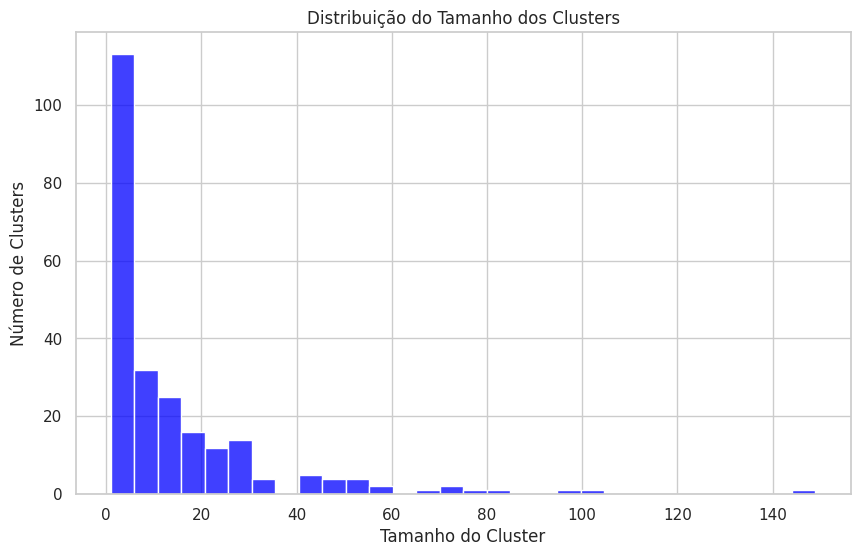

<ipython-input-49-4b21c77a645b>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_size_counts.index, y=cluster_size_counts.values, palette="viridis")


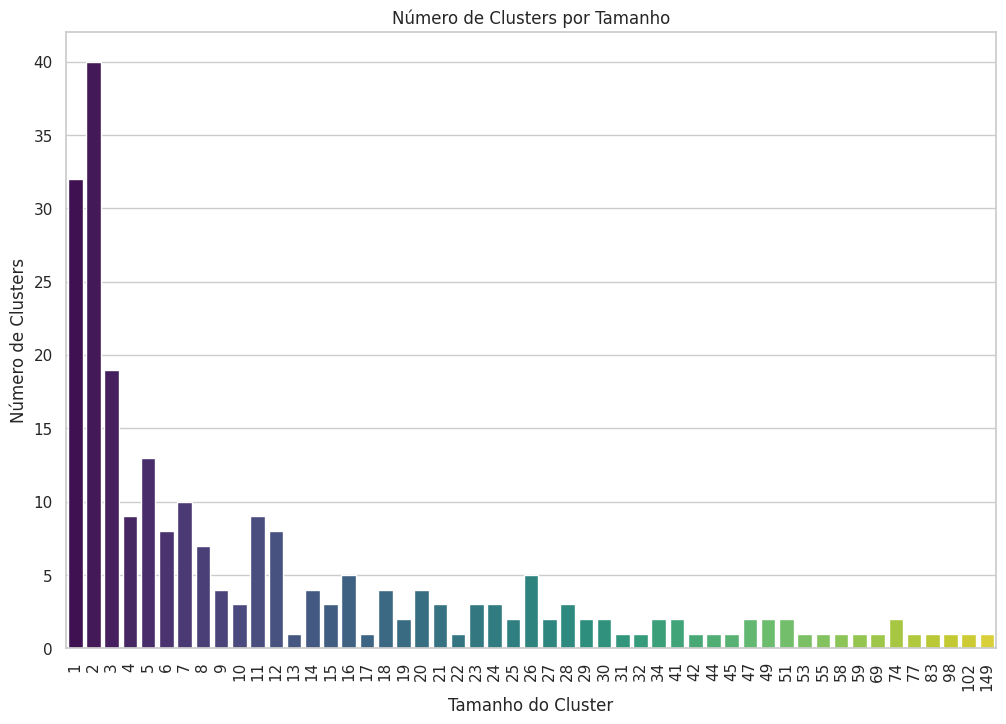

In [ ]:
# Cluster file path
cluster_file = 'clusters.fasta.clstr'

def parse_cd_hit_clstr(cluster_file):
    clusters = {}
    with open(cluster_file, 'r') as file:
        cluster_id = None
        for line in file:
            line = line.strip()
            if line.startswith('>Cluster'):
                cluster_id = int(line.split()[-1])
                clusters[cluster_id] = []
            else:
                sequence_id = line.split('>')[1].split('...')[0]
                clusters[cluster_id].append(sequence_id)
    return clusters


clusters = parse_cd_hit_clstr(cluster_file)

# Prepare the data for the graphs
cluster_sizes = [len(seq_ids) for seq_ids in clusters.values()]

# DataFrame for easy manipulation and visualisation
df = pd.DataFrame({'Cluster Size': cluster_sizes})

# Configuration for visualisation
sns.set(style="whitegrid")

# Histogram of cluster size distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Cluster Size'], bins=30, kde=False, color="blue")
plt.title('Distribuição do Tamanho dos Clusters')
plt.xlabel('Tamanho do Cluster')
plt.ylabel('Número de Clusters')
plt.show()

# Bar chart of the number of clusters by specific size
plt.figure(figsize=(12, 8))
cluster_size_counts = df['Cluster Size'].value_counts().sort_index()
sns.barplot(x=cluster_size_counts.index, y=cluster_size_counts.values, palette="viridis")
plt.title('Número de Clusters por Tamanho')
plt.xlabel('Tamanho do Cluster')
plt.ylabel('Número de Clusters')
plt.xticks(rotation=90)
plt.show()


<ipython-input-51-6bd613deb505>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Cluster Size'], palette="muted", inner="quartile")


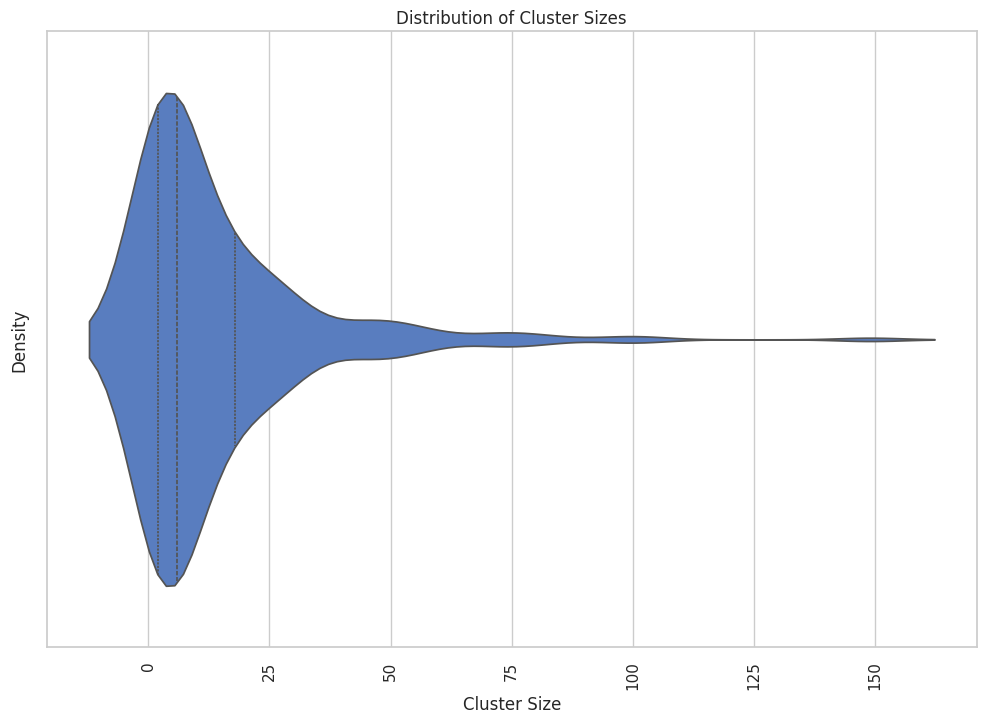

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.violinplot(x=df['Cluster Size'], palette="muted", inner="quartile")
plt.title('Distribution of Cluster Sizes')
plt.xlabel('Cluster Size')
plt.ylabel('Density')
plt.xticks(rotation=90)
plt.show()


In [ ]:

cluster_file = 'clusters.fasta.clstr'

with open(cluster_file, 'r') as file:
    clusters = file.read().split('>Cluster')


cluster_ids = []
for cluster in clusters:
    lines = cluster.split('\n')
    for line in lines:
        if '*' in line:
            id = line.split('>')[1].split('...')[0]
            cluster_ids.append(id)

# Filter the original DataFrame to remove non-AMP homologues
amp_ids = dataset[dataset['Function'] == 'AMP']['id'].tolist()
non_amp_ids = dataset[dataset['Function'] == 'non-AMP']['id'].tolist()


remove_ids = [id for id in non_amp_ids if id in cluster_ids]


filtered_data = dataset[~dataset['id'].isin(remove_ids)]


filtered_data.to_csv('sequencias_filtradas.csv', index=False)

print("Filtragem concluída e novo CSV gerado com sucesso!")


Filtragem concluída e novo CSV gerado com sucesso!


In [ ]:
novo_dataset=pd.read_csv("/content/sequencias_filtradas.csv")

In [ ]:
novo_dataset

,Sequence,Function,id
0,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE,1
1,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE,2
2,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,antibacterian group ESKAPE,3
3,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,antibacterian group ESKAPE,4
4,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,antibacterian group ESKAPE,5
...,...,...,...
10273,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...,non-AMP,10274
10274,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...,non-AMP,10275
10275,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...,non-AMP,10276
10276,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...,non-AMP,10277


# Experimentar CD-HIT-2D:

In [ ]:
dataset=pd.read_csv("/content/eskape_atualizado.csv")

In [ ]:
dataset

,Sequence,Name,Target_Organism,Function
0,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Staphylococcus aureus,antibacterian group ESKAPE
1,VTSWSLCTPGCTSPGGGSNCSFCC,Microbisporicin A1 (Bacteriocin),L Enterococcus faecium,antibacterian group ESKAPE
2,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,Aureocin A53 (Bacteriocin),Staphylococcus aureus,antibacterian group ESKAPE
3,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,Enterocin P (Pediocin-like peptide; Bacteriocin),Enterococcus faecium,antibacterian group ESKAPE
4,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,antibacterian group ESKAPE
...,...,...,...,...
3639,RRIRPRPPRLPRPRPRPLPFPRPIPRPLPFP,Bac 7,NaN,antibacterian group ESKAPE
3640,LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES,LL37,NaN,antibacterian group ESKAPE
3641,RIVQRIKDFL,17BIPHE2,NaN,antibacterian group ESKAPE
3642,FKRIVQRIKDFLRNLV,FK16,NaN,antibacterian group ESKAPE


In [ ]:
import pandas as pd

dataset['id'] = range(1, len(dataset) + 1)


fasta_file = 'sequencias_amp_eskape.fasta'

with open(fasta_file, 'w') as fasta:
    for index, row in dataset.iterrows():
        fasta.write(f">{row['id']}\n{row['Sequence']}\n")

print("Arquivo FASTA gerado com sucesso!")

Arquivo FASTA gerado com sucesso!


In [ ]:
import re

input_fasta = 'sequencias_amp_eskape.fasta'
output_fasta = 'sequencias_cleaned_amp_eskape.fasta'

def clean_sequence(seq):

    return re.sub(r'[^ACDEFGHIKLMNPQRSTVWY]', '', seq)

with open(input_fasta, 'r') as infile, open(output_fasta, 'w') as outfile:
    current_id = None
    current_sequence = []
    for line in infile:
        if line.startswith('>'):
            if current_id:

                clean_seq = clean_sequence(''.join(current_sequence))
                if clean_seq:
                    outfile.write(f'>{current_id}\n{clean_seq}\n')
            current_id = line[1:].strip()
            current_sequence = []
        else:
            current_sequence.append(line.strip())

    if current_id:
        clean_seq = clean_sequence(''.join(current_sequence))
        if clean_seq:
            outfile.write(f'>{current_id}\n{clean_seq}\n')

print(f"Arquivo FASTA limpo salvo em {output_fasta}")

Arquivo FASTA limpo salvo em sequencias_cleaned_amp_eskape.fasta


In [ ]:

dataset1_file = '/content/sequencias_cleaned_amp_eskape.fasta'
dataset2_file = '/content/unique_sequences_eskape.fasta'
output_file = 'dataset1_filtered.fasta'

In [ ]:
# Executar CD-HIT-2D
!cd-hit-2d -i {dataset1_file} -i2 {dataset2_file} -o {output_file} -c 0.95 -n 5

Program: CD-HIT, V4.8.1 (+OpenMP), Aug 20 2021, 08:39:56
Command: cd-hit-2d -i
         /content/sequencias_cleaned_amp_eskape.fasta -i2
         /content/unique_sequences_eskape.fasta -o
         dataset1_filtered.fasta -c 0.95 -n 5

Started: Wed Jul 10 20:25:22 2024
                            Output                              
----------------------------------------------------------------
total seq in db1: 3357
total seq in db2: 6634
longest and shortest : 197 and 11
Total letters: 76436
Sequences have been sorted
longest and shortest : 200 and 32
Total letters: 802488

Approximated minimal memory consumption:
Sequence        : 1M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 77M

Table limit with the given memory limit:
Max number of representatives: 3340256
Max number of word counting entries: 90270423

..........        0  compared          0  clusters

6634 compared	0 clustered
writing non-redundant sequences from db2


no redundancy


CD HIT FOR EACH OF THE DATASETS:

In [ ]:
!cd-hit -i unique_sequences_eskape.fasta -o clusters.fasta -c 0.9 -n 5

Program: CD-HIT, V4.8.1 (+OpenMP), Aug 20 2021, 08:39:56
Command: cd-hit -i unique_sequences_eskape.fasta -o
         clusters.fasta -c 0.9 -n 5

Started: Wed Jul 10 20:48:42 2024
                            Output                              
----------------------------------------------------------------
total seq: 6634
longest and shortest : 200 and 32
Total letters: 802488
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 1M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 77M

Table limit with the given memory limit:
Max number of representatives: 2933240
Max number of word counting entries: 90270473

comparing sequences from          0  to       6634
......
     6634  finished       6634  clusters

Approximated maximum memory consumption: 84M
writing new database
writing clustering information
program completed !

Total CPU time 0.58


In [ ]:
!cd-hit -i sequencias_cleaned_amp_eskape.fasta -o clusters_eskape.fasta -c 0.9 -n 5

Program: CD-HIT, V4.8.1 (+OpenMP), Aug 20 2021, 08:39:56
Command: cd-hit -i sequencias_cleaned_amp_eskape.fasta -o
         clusters_eskape.fasta -c 0.9 -n 5

Started: Wed Jul 10 20:46:44 2024
                            Output                              
----------------------------------------------------------------
total seq: 3357
longest and shortest : 197 and 11
Total letters: 76436
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90438628

comparing sequences from          0  to       3357
...
     3357  finished       1275  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.19


In [ ]:
def count_unique_sequences(filename):
    unique_sequences = set()
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('>'):
                sequence_id = line.strip().split()[0][1:]
                unique_sequences.add(sequence_id)
    return len(unique_sequences)


filename = 'clusters_eskape.fasta'
total_unique_sequences = count_unique_sequences(filename)

print(f'Total de sequências únicas após clustering: {total_unique_sequences}')


Total de sequências únicas após clustering: 1275


# Add more species of the genus Enterobacter spp:

In [ ]:
gram_neg=pd.read_csv("/content/GramNeg_final.csv")

In [ ]:
gram_neg

,Unnamed: 0,Sequence,Name,Target_Organism,Function
0,0,GGAGHVPEYFVGIGTPISFYG,Microcin J25 (MccJ25; Bacteriocin),Escherichia coli,Gram Negative
1,4,GGAGHVPEYFVGIGTPISFYG,Microcin J25 (MccJ25; Bacteriocin),Salmonella species,Gram Negative
2,5,GGAGHVPEYFVGIGTPISFYG,Microcin J25 (MccJ25; Bacteriocin),Shigella flexneri,Gram Negative
3,6,GETDPNTQLLNDLGNNMAWGAALGAPGGLGSAALGAAGGALQTVGQ...,Microcin E492 (MccE492; Bacteriocin),Escherichia coli,Gram Negative
4,7,GETDPNTQLLNDLGNNMAWGAALGAPGGLGSAALGAAGGALQTVGQ...,Microcin E492 (MccE492; Bacteriocin),Escherichia coli,Gram Negative
...,...,...,...,...,...
563,731,XTXXXfLXXT,polymyxin B (a mixture of polymyxin B1 to B4),Proteus vulgaris,Gram Negative
564,732,XTXXXfLXXT,polymyxin B (a mixture of polymyxin B1 to B4),Providencia alcalifaciens,Gram Negative
565,733,XTXXXfLXXT,polymyxin B (a mixture of polymyxin B1 to B4),Providencia rettgeri,Gram Negative
566,734,XTXXXfLXXT,polymyxin B (a mixture of polymyxin B1 to B4),Providencia spp. and Providencia,Gram Negative


In [ ]:
gram_neg.drop(columns="Unnamed: 0", inplace=True)

In [ ]:
gram_neg

,Sequence,Name,Target_Organism,Function
0,GGAGHVPEYFVGIGTPISFYG,Microcin J25 (MccJ25; Bacteriocin),Escherichia coli,Gram Negative
1,GGAGHVPEYFVGIGTPISFYG,Microcin J25 (MccJ25; Bacteriocin),Salmonella species,Gram Negative
2,GGAGHVPEYFVGIGTPISFYG,Microcin J25 (MccJ25; Bacteriocin),Shigella flexneri,Gram Negative
3,GETDPNTQLLNDLGNNMAWGAALGAPGGLGSAALGAAGGALQTVGQ...,Microcin E492 (MccE492; Bacteriocin),Escherichia coli,Gram Negative
4,GETDPNTQLLNDLGNNMAWGAALGAPGGLGSAALGAAGGALQTVGQ...,Microcin E492 (MccE492; Bacteriocin),Escherichia coli,Gram Negative
...,...,...,...,...
563,XTXXXfLXXT,polymyxin B (a mixture of polymyxin B1 to B4),Proteus vulgaris,Gram Negative
564,XTXXXfLXXT,polymyxin B (a mixture of polymyxin B1 to B4),Providencia alcalifaciens,Gram Negative
565,XTXXXfLXXT,polymyxin B (a mixture of polymyxin B1 to B4),Providencia rettgeri,Gram Negative
566,XTXXXfLXXT,polymyxin B (a mixture of polymyxin B1 to B4),Providencia spp. and Providencia,Gram Negative


In [ ]:
def separar_enterobacter(df):
    """
    Separa as sequências cujos organismos contêm a palavra 'Enterobacter' de um DataFrame original.

    Parâmetros:
    df (pd.DataFrame): O DataFrame original.

    Retorna:
    tuple: Dois DataFrames, um contendo as sequências com 'Enterobacter' e outro contendo as sequências sem 'Enterobacter'.
    """

    gram_neg['Target_Organism'] = gram_neg['Target_Organism'].fillna('')

    # DataFrame with 'Enterobacter'
    df_enterobacter = gram_neg[gram_neg['Target_Organism'].str.contains('Enterobacter')]

    # DataFrame without 'Enterobacter'
    df_sem_enterobacter = gram_neg[~gram_neg['Target_Organism'].str.contains('Enterobacter')]

    return df_enterobacter, df_sem_enterobacter


df_enterobacter, df_sem_enterobacter = separar_enterobacter(gram_neg)

print("Sequências com 'Enterobacter':")
print(df_enterobacter)

print("\nSequências sem 'Enterobacter':")
print(df_sem_enterobacter)

Sequências com 'Enterobacter':
                                              Sequence  \
14                           GVVDILKGAAKDIAGHLASKVMNKL   
38                  KRFKKFFKKLKNSVKKRAKKFFKKPRVIGVSIPF   
114  ASGRDIAMAIGTLSGQFVAGGIGAAAGGVAGGAIYDYASTHKPNPA...   
158                                    IIGHLIKTALGFLGL   
165                     KFFKKLKNSVKKRAKKFFKKPKVIGVTFPF   
166                     KFFKKLKNSVKKRAKKFFKKPKVIGVTFPF   
196          GILDTIKSIASKVWNSKTVQDLKRKGINWVANKLGVSPQAA   
323                                           RYPAVGYT   
462  MNFNKFFVLFALIMVAVVGQSEAGWLKKLGKKIERVGQHTRDATIQ...   
553                                         XTXXXfLXXT   

                                                  Name  \
14   Ocellatin-F1 (Fallaxin; Frogs, amphibians, ani...   
38                 OH-CATH (Snakes, reptiles, animals)   
114                Colicin-V (Microcin-V; Bacteriocin)   
158        Signiferin-2.2 (Frogs, amphibians, animals)   
165  Cathelicidin-NA (Cathelicidin-relat

In [ ]:
df_enterobacter

,Sequence,Name,Target_Organism,Function
14,GVVDILKGAAKDIAGHLASKVMNKL,"Ocellatin-F1 (Fallaxin; Frogs, amphibians, ani...",Enterobacter cloacae,Gram Negative
38,KRFKKFFKKLKNSVKKRAKKFFKKPRVIGVSIPF,"OH-CATH (Snakes, reptiles, animals)",Enterobacter aerogenes strain,Gram Negative
114,ASGRDIAMAIGTLSGQFVAGGIGAAAGGVAGGAIYDYASTHKPNPA...,Colicin-V (Microcin-V; Bacteriocin),Enterobacteriaceae,Gram Negative
158,IIGHLIKTALGFLGL,"Signiferin-2.2 (Frogs, amphibians, animals)",Enterobacter cloacae,Gram Negative
165,KFFKKLKNSVKKRAKKFFKKPKVIGVTFPF,Cathelicidin-NA (Cathelicidin-related protein;...,Enterobacter aerogenes strain,Gram Negative
166,KFFKKLKNSVKKRAKKFFKKPKVIGVTFPF,Cathelicidin-NA (Cathelicidin-related protein;...,Enterobacter cloacae strain,Gram Negative
196,GILDTIKSIASKVWNSKTVQDLKRKGINWVANKLGVSPQAA,Hadrurin (Non-disulfide-bridged peptide 3.1),Enterobacter cloacae,Gram Negative
323,RYPAVGYT,"Lacrain (myriapods, arthropods, invertebrates,...",Enterobacter cloacae,Gram Negative
462,MNFNKFFVLFALIMVAVVGQSEAGWLKKLGKKIERVGQHTRDATIQ...,Lucilin Peptide,Enterobacter cloacae,Gram Negative
553,XTXXXfLXXT,polymyxin B (a mixture of polymyxin B1 to B4),Enterobacter spp.,Gram Negative


# Filter and save sequences with the following keywords:

In [ ]:

input_file = "/content/uniprotkb_Enterobacter_2024_07_04.fasta"
output_file = "/content/eskape_Enterobacter.fasta"


keywords = [
    "antimicrobial", "antibacterial", "antifungal", "anticancer",
    "antiviral", "antiparasitic", "antibiotic", "antibiofilm", "effector"
]

def contains_keyword(description, keywords):
    """Verifica se a descrição contém alguma das palavras-chave."""
    return any(keyword in description.lower() for keyword in keywords)


with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    for record in SeqIO.parse(infile, "fasta"):
        if contains_keyword(record.description, keywords):
            SeqIO.write(record, outfile, "fasta")

print(f"Filtragem completa. Sequências positivas salvas em {output_file}")


Filtragem completa. Sequências positivas salvas em /content/eskape_Enterobacter.fasta


Ver se há replicas e eleminar:

In [ ]:
# merge

import os

def merge_fasta_files(input_files, output_file):
    with open(output_file, 'w') as outfile:
        for fname in input_files:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
    print(f"Merged {len(input_files)} FASTA files into {output_file}")


input_files = ["/content/eskape_Enterobacter.fasta", "/content/eskape_Enterococcus_faecium.fasta", "/content/eskape_Klebsiella_pneumoniae.fasta","/content/eskape_Pseudomonas_aeruginosa.fasta","/content/eskape_Staphylococcus_aureus.fasta","/content/uniprotkb_Acinetobacter_baumannii (1) (1).fasta"]


output_file = "merged.fasta"


merge_fasta_files(input_files, output_file)


Merged 6 FASTA files into merged.fasta


In [ ]:
def remove_duplicates(input_file, output_file):
    sequences = {}


    for record in SeqIO.parse(input_file, "fasta"):
        seq = str(record.seq)
        if seq not in sequences:
            sequences[seq] = record


    with open(output_file, "w") as outfile:
        SeqIO.write(sequences.values(), outfile, "fasta")

    print(f"Removed duplicates. The cleaned file is saved as {output_file}")


input_file = "/content/merged.fasta"


output_file = "cleaned_file.fasta"


remove_duplicates(input_file, output_file)



Removed duplicates. The cleaned file is saved as cleaned_file.fasta


In [ ]:
def count_sequences(fasta_file):
    count = 0
    for record in SeqIO.parse(fasta_file, "fasta"):
        count += 1
    print(f"The file {fasta_file} contains {count} sequences.")


fasta_file = "/content/cleaned_file.fasta"


count_sequences(fasta_file)

The file /content/cleaned_file.fasta contains 49517 sequences.


49517 sequences

Compare with the dataset we already had:

In [ ]:

input_files=["/content/cleaned_file.fasta","/content/merged.fasta"]
output_file="/content/total_eskape.fasta"
merge_fasta_files(input_files, output_file)

Merged 2 FASTA files into /content/total_eskape.fasta


In [ ]:

input_file="/content/total_eskape.fasta"
output_file="/content/unique_total_eskape.fasta"
remove_duplicates(input_file, output_file)

Removed duplicates. The cleaned file is saved as /content/unique_total_eskape.fasta


In [ ]:
fasta_file="/content/unique_total_eskape.fasta"
count_sequences(fasta_file)

The file /content/unique_total_eskape.fasta contains 49517 sequences.


In [ ]:

from Bio import SeqIO
import pandas as pd


input_file = "/content/cleaned_file.fasta"
csv_file = "/content/cleaned_file.csv"


min_length = 10
max_length = 200


non_standard_residues = {'B', 'J', 'O', 'U', 'X', 'Z'}  #ver sem isto tbm

def is_valid_sequence(sequence):

    if not (min_length <= len(sequence) <= max_length):
        return False
    if any(residue in non_standard_residues for residue in sequence):
        return False
    return True


ids = []
sequences = []

for record in SeqIO.parse(input_file, "fasta"):
    if is_valid_sequence(record.seq):
        ids.append(record.id)
        sequences.append(str(record.seq))


df = pd.DataFrame({
    "ID": ids,
    "Sequence": sequences
})


df.to_csv(csv_file, index=False)

print(f"Conversão completa. Sequências salvas em {csv_file}")




Conversão completa. Sequências salvas em /content/cleaned_file.csv


In [ ]:
novas=pd.read_csv("/content/cleaned_file.csv")

In [ ]:
novas

,ID,Sequence
0,sp|P36193|DROS_DROME,MKFTIVFLLLACVFAMGVATPGKPRPYSPRPTSHPRPIRVRREALA...
1,sp|B3EWQ6|AMP1_PAEAL,YSKSLPLSVLNP
2,sp|Q6XMH8|DROS_DROSI,MKFTIVFLLLACVFAMAVATPGKPRPYSPRPTSHPRPIRVRREALA...
3,sp|Q8GPH6|EHPR_ENTAG,MTDLAGPTITPNLQLVYVSNVERSTDFYRFIFKKEPVFVTPRYVAF...
4,tr|A0A0U1LDK7|A0A0U1LDK7_9ENTR,MSRRNTDAITIHSILDWIEDNLESPLSLEKVSERSGYSKWHLQRMF...
...,...,...
8833,tr|A0A009HI01|A0A009HI01_ACIB9,MNPAFIALPYTAAISQPIDERITLCITVPHTNNDIQLKWQTSEIPA...
8834,tr|A0A009HI17|A0A009HI17_ACIB9,MQAHADYIAQPQSVASQAARFSTMGIHDLQKAAQAGQAGAQFYLGT...
8835,tr|A0A009HI29|A0A009HI29_ACIB9,MTIRPILKNLSISLCLSCITTSLFASPAKLSSVKELMQMSQIDYLL...
8836,tr|A0A009HI44|A0A009HI44_9GAMM,MTHLNELYLILNKSLKWNKSHLKCFALIMLVIILKQTCNLSSASKA...


In [ ]:
novas["Function"]="AMP"

In [ ]:
novas

,ID,Sequence,Function
0,sp|P36193|DROS_DROME,MKFTIVFLLLACVFAMGVATPGKPRPYSPRPTSHPRPIRVRREALA...,AMP
1,sp|B3EWQ6|AMP1_PAEAL,YSKSLPLSVLNP,AMP
2,sp|Q6XMH8|DROS_DROSI,MKFTIVFLLLACVFAMAVATPGKPRPYSPRPTSHPRPIRVRREALA...,AMP
3,sp|Q8GPH6|EHPR_ENTAG,MTDLAGPTITPNLQLVYVSNVERSTDFYRFIFKKEPVFVTPRYVAF...,AMP
4,tr|A0A0U1LDK7|A0A0U1LDK7_9ENTR,MSRRNTDAITIHSILDWIEDNLESPLSLEKVSERSGYSKWHLQRMF...,AMP
...,...,...,...
8833,tr|A0A009HI01|A0A009HI01_ACIB9,MNPAFIALPYTAAISQPIDERITLCITVPHTNNDIQLKWQTSEIPA...,AMP
8834,tr|A0A009HI17|A0A009HI17_ACIB9,MQAHADYIAQPQSVASQAARFSTMGIHDLQKAAQAGQAGAQFYLGT...,AMP
8835,tr|A0A009HI29|A0A009HI29_ACIB9,MTIRPILKNLSISLCLSCITTSLFASPAKLSSVKELMQMSQIDYLL...,AMP
8836,tr|A0A009HI44|A0A009HI44_9GAMM,MTHLNELYLILNKSLKWNKSHLKCFALIMLVIILKQTCNLSSASKA...,AMP


In [ ]:
novas_unique = novas.drop_duplicates(subset='Sequence')

In [ ]:
novas_unique

,ID,Sequence,Function
0,sp|P36193|DROS_DROME,MKFTIVFLLLACVFAMGVATPGKPRPYSPRPTSHPRPIRVRREALA...,AMP
1,sp|B3EWQ6|AMP1_PAEAL,YSKSLPLSVLNP,AMP
2,sp|Q6XMH8|DROS_DROSI,MKFTIVFLLLACVFAMAVATPGKPRPYSPRPTSHPRPIRVRREALA...,AMP
3,sp|Q8GPH6|EHPR_ENTAG,MTDLAGPTITPNLQLVYVSNVERSTDFYRFIFKKEPVFVTPRYVAF...,AMP
4,tr|A0A0U1LDK7|A0A0U1LDK7_9ENTR,MSRRNTDAITIHSILDWIEDNLESPLSLEKVSERSGYSKWHLQRMF...,AMP
...,...,...,...
8833,tr|A0A009HI01|A0A009HI01_ACIB9,MNPAFIALPYTAAISQPIDERITLCITVPHTNNDIQLKWQTSEIPA...,AMP
8834,tr|A0A009HI17|A0A009HI17_ACIB9,MQAHADYIAQPQSVASQAARFSTMGIHDLQKAAQAGQAGAQFYLGT...,AMP
8835,tr|A0A009HI29|A0A009HI29_ACIB9,MTIRPILKNLSISLCLSCITTSLFASPAKLSSVKELMQMSQIDYLL...,AMP
8836,tr|A0A009HI44|A0A009HI44_9GAMM,MTHLNELYLILNKSLKWNKSHLKCFALIMLVIILKQTCNLSSASKA...,AMP


In [ ]:
novas_unique["Function"]="antibacterian group ESKAPE"

In [ ]:
novas_unique

,ID,Sequence,Function
0,sp|P36193|DROS_DROME,MKFTIVFLLLACVFAMGVATPGKPRPYSPRPTSHPRPIRVRREALA...,antibacterian group ESKAPE
1,sp|B3EWQ6|AMP1_PAEAL,YSKSLPLSVLNP,antibacterian group ESKAPE
2,sp|Q6XMH8|DROS_DROSI,MKFTIVFLLLACVFAMAVATPGKPRPYSPRPTSHPRPIRVRREALA...,antibacterian group ESKAPE
3,sp|Q8GPH6|EHPR_ENTAG,MTDLAGPTITPNLQLVYVSNVERSTDFYRFIFKKEPVFVTPRYVAF...,antibacterian group ESKAPE
4,tr|A0A0U1LDK7|A0A0U1LDK7_9ENTR,MSRRNTDAITIHSILDWIEDNLESPLSLEKVSERSGYSKWHLQRMF...,antibacterian group ESKAPE
...,...,...,...
8833,tr|A0A009HI01|A0A009HI01_ACIB9,MNPAFIALPYTAAISQPIDERITLCITVPHTNNDIQLKWQTSEIPA...,antibacterian group ESKAPE
8834,tr|A0A009HI17|A0A009HI17_ACIB9,MQAHADYIAQPQSVASQAARFSTMGIHDLQKAAQAGQAGAQFYLGT...,antibacterian group ESKAPE
8835,tr|A0A009HI29|A0A009HI29_ACIB9,MTIRPILKNLSISLCLSCITTSLFASPAKLSSVKELMQMSQIDYLL...,antibacterian group ESKAPE
8836,tr|A0A009HI44|A0A009HI44_9GAMM,MTHLNELYLILNKSLKWNKSHLKCFALIMLVIILKQTCNLSSASKA...,antibacterian group ESKAPE


In [ ]:
antigas=pd.read_csv("/content/DATASET (1).csv")

In [ ]:
juntas= pd.merge(novas_unique,antigas, how="outer")

In [ ]:
juntas.drop(columns="Unnamed: 0")

,ID,Sequence,Function
0,sp|P36193|DROS_DROME,MKFTIVFLLLACVFAMGVATPGKPRPYSPRPTSHPRPIRVRREALA...,antibacterian group ESKAPE
1,sp|B3EWQ6|AMP1_PAEAL,YSKSLPLSVLNP,antibacterian group ESKAPE
2,sp|Q6XMH8|DROS_DROSI,MKFTIVFLLLACVFAMAVATPGKPRPYSPRPTSHPRPIRVRREALA...,antibacterian group ESKAPE
3,sp|Q8GPH6|EHPR_ENTAG,MTDLAGPTITPNLQLVYVSNVERSTDFYRFIFKKEPVFVTPRYVAF...,antibacterian group ESKAPE
4,tr|A0A0U1LDK7|A0A0U1LDK7_9ENTR,MSRRNTDAITIHSILDWIEDNLESPLSLEKVSERSGYSKWHLQRMF...,antibacterian group ESKAPE
...,...,...,...
17502,NaN,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...,non-AMP
17503,NaN,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...,non-AMP
17504,NaN,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...,non-AMP
17505,NaN,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...,non-AMP


In [ ]:
sem_replicas = juntas.drop_duplicates(subset='Sequence')

In [ ]:
sem_replicas

,ID,Sequence,Function,Unnamed: 0
0,sp|P36193|DROS_DROME,MKFTIVFLLLACVFAMGVATPGKPRPYSPRPTSHPRPIRVRREALA...,antibacterian group ESKAPE,NaN
1,sp|B3EWQ6|AMP1_PAEAL,YSKSLPLSVLNP,antibacterian group ESKAPE,443.0
2,sp|Q6XMH8|DROS_DROSI,MKFTIVFLLLACVFAMAVATPGKPRPYSPRPTSHPRPIRVRREALA...,antibacterian group ESKAPE,NaN
3,sp|Q8GPH6|EHPR_ENTAG,MTDLAGPTITPNLQLVYVSNVERSTDFYRFIFKKEPVFVTPRYVAF...,antibacterian group ESKAPE,NaN
4,tr|A0A0U1LDK7|A0A0U1LDK7_9ENTR,MSRRNTDAITIHSILDWIEDNLESPLSLEKVSERSGYSKWHLQRMF...,antibacterian group ESKAPE,NaN
...,...,...,...,...
17502,NaN,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...,non-AMP,8668.0
17503,NaN,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...,non-AMP,8669.0
17504,NaN,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...,non-AMP,8670.0
17505,NaN,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...,non-AMP,8671.0


In [ ]:
sem_replicas=sem_replicas.drop(columns="Unnamed: 0")

In [ ]:

sequence_counts = sem_replicas['Sequence'].value_counts()
output_csv = "/content/filtered_sequences.csv"
unique_sequences = sequence_counts[sequence_counts == 1].index


filtered_df = sem_replicas[sem_replicas['Sequence'].isin(unique_sequences)]


filtered_df.to_csv(output_csv, index=False)

print(f"Sequências únicas salvas em {output_csv}")

Sequências únicas salvas em /content/filtered_sequences.csv


In [ ]:
output_csv=pd.read_csv("/content/cleaned_file.csv")

In [ ]:
output_csv

,ID,Sequence
0,sp|P36193|DROS_DROME,MKFTIVFLLLACVFAMGVATPGKPRPYSPRPTSHPRPIRVRREALA...
1,sp|B3EWQ6|AMP1_PAEAL,YSKSLPLSVLNP
2,sp|Q6XMH8|DROS_DROSI,MKFTIVFLLLACVFAMAVATPGKPRPYSPRPTSHPRPIRVRREALA...
3,sp|Q8GPH6|EHPR_ENTAG,MTDLAGPTITPNLQLVYVSNVERSTDFYRFIFKKEPVFVTPRYVAF...
4,tr|A0A0U1LDK7|A0A0U1LDK7_9ENTR,MSRRNTDAITIHSILDWIEDNLESPLSLEKVSERSGYSKWHLQRMF...
...,...,...
8833,tr|A0A009HI01|A0A009HI01_ACIB9,MNPAFIALPYTAAISQPIDERITLCITVPHTNNDIQLKWQTSEIPA...
8834,tr|A0A009HI17|A0A009HI17_ACIB9,MQAHADYIAQPQSVASQAARFSTMGIHDLQKAAQAGQAGAQFYLGT...
8835,tr|A0A009HI29|A0A009HI29_ACIB9,MTIRPILKNLSISLCLSCITTSLFASPAKLSSVKELMQMSQIDYLL...
8836,tr|A0A009HI44|A0A009HI44_9GAMM,MTHLNELYLILNKSLKWNKSHLKCFALIMLVIILKQTCNLSSASKA...


In [ ]:
function_counts = sem_replicas['Function'].value_counts()


function_counts_df = function_counts.reset_index()
function_counts_df.columns = ['Function', 'count']

print(function_counts_df)

                     Function  count
0  antibacterian group ESKAPE  10873
1                     non-AMP   5620


In [ ]:
antigas

,Unnamed: 0,Sequence,Function
0,0,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE
1,1,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,antibacterian group ESKAPE
2,2,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,antibacterian group ESKAPE
3,3,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,antibacterian group ESKAPE
4,4,VNYGNGVSCSKTKCSVNWGQAFQERYTAGINSFVSGVASGAGSIGRRP,antibacterian group ESKAPE
...,...,...,...
8668,8668,MDWPKEIARMAFVKNALHEADTRKIWPYYLPELGATIDNIVKTEVI...,non-AMP
8669,8669,MNTFLMIMGISVYILAFILVVAKQITTSTAIKWTKWDEAKPVILLF...,non-AMP
8670,8670,MTPELPGTYINLLADIVKRRGISCEQFLEGSGVTPEQLKKPYWYVE...,non-AMP
8671,8671,MNLQPIKIFLSHKSVNKPKVREFKKTLELLGFQPWLDEDAMHAGVE...,non-AMP


In [ ]:
function_counts = antigas['Function'].value_counts()

function_counts_df = function_counts.reset_index()
function_counts_df.columns = ['Function', 'count']
print(function_counts_df)

                     Function  count
0                     non-AMP   6634
1  antibacterian group ESKAPE   2039


ver cd-hit-2d:

## ADP 3

In [ ]:
pip install beautifulsoup4


In [ ]:
from bs4 import BeautifulSoup
import csv

In [ ]:
from bs4 import BeautifulSoup
import csv


html_file = '/content/S.aureus AMP Database Search.html'


with open(html_file, 'r', encoding='utf-8') as file:
    html = file.read()


soup = BeautifulSoup(html, 'html.parser')


form = soup.find('form', id='selectID')
table = form.find('table') if form else None

if table:

    csv_file = 'tabela.csv'
    with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
        csvwriter = csv.writer(csvfile)


        csvwriter.writerow(['Checkbox Value', 'Button Text', 'Peptide ID', 'Description', 'Sequence'])

        # Process rows of data

        for row in table.find_all('tr'):
            columns = row.find_all('td')
            if len(columns) == 2:
                checkbox_value = columns[0].find('input').get('value')
                button_text = columns[0].find('button').text
                description_lines = columns[0].stripped_strings
                peptide_id = next(description_lines, '')
                description = ' '.join(description_lines)
                sequence = columns[1].find('p', class_='sequence').text.strip()


                csvwriter.writerow([checkbox_value, button_text, peptide_id, description, sequence])

    print(f"Conversão completa. O arquivo '{csv_file}' foi criado.")
else:
    print("Tabela não encontrada no HTML.")




Conversão completa. O arquivo 'tabela.csv' foi criado.


In [ ]:
tabela=pd.read_csv("/content/tabela.csv")

In [ ]:
tabela

,Checkbox Value,Button Text,Peptide ID,Description,Sequence
0,1,AP00001,AP00001,"P31107 Dermaseptin-B2 (XXA, DRS-B2, Dermasept...",GLWSKIKEVGKEAAKAAAKAAGKAALGAVSEAV
1,13,AP00013,AP00013,"1VM5 Aurein 1.2 (natural AMPs; XXA, UCLL1c; fr...",GLFDIIKKIAESF
2,15,AP00015,AP00015,"P82389 Aurein 2.2 (natural AMPs; XXA, UCLL1c; ...",GLFDIVKKVVGALGSL
3,16,AP00016,AP00016,"P82390 Aurein 2.3 (natural AMPs; XXA, UCLL1c; ...",GLFDIVKKVVGAIGSL
4,17,AP00017,AP00017,"P82391 Aurein 2.4 (natural AMPs; XXA, UCLL1c; ...",GLFDIVKKVVGTLAGL
...,...,...,...,...,...
2360,4755,AP04755,AP04755,"Ref DeNo1001 (Synthetic, UCLL1)",DLLSGLGKAAKKVAKTVLKNLLKC
2361,4756,AP04756,AP04756,"Ref DeNo1018 (Synthetic, Lys-rich, UCLL1)",WLPKIAGKIAGKLLKKLLKKIKKK
2362,4757,AP04757,AP04757,"Ref DeNo1040 (Synthetic, Leu-rich, UCLL1)",MLPSILGALLKLL
2363,4761,AP04761,AP04761,"Ref DeNo1057 (Synthetic, Leu-rich, Lys-rich, U...",ILGKLLKKLLKKL


merge

In [ ]:
import pandas as pd


csv_files = ["/content/A.baumannii.csv", "/content/E.facium.csv", "/content/Enterobacterspp.csv", "/content/pseudomonas_completo.csv", "/content/k.pneumoniae.csv", "/content/S.auros.csv"]


df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)


combined_df.to_csv("combined.csv", index=False)


In [ ]:
combined=pd.read_csv("/content/S.auros.csv")

In [ ]:
combined

,Checkbox Value,Button Text,Peptide ID,Description,Sequence
0,1,AP00001,AP00001,"P31107 Dermaseptin-B2 (XXA, DRS-B2, Dermasept...",GLWSKIKEVGKEAAKAAAKAAGKAALGAVSEAV
1,13,AP00013,AP00013,"1VM5 Aurein 1.2 (natural AMPs; XXA, UCLL1c; fr...",GLFDIIKKIAESF
2,15,AP00015,AP00015,"P82389 Aurein 2.2 (natural AMPs; XXA, UCLL1c; ...",GLFDIVKKVVGALGSL
3,16,AP00016,AP00016,"P82390 Aurein 2.3 (natural AMPs; XXA, UCLL1c; ...",GLFDIVKKVVGAIGSL
4,17,AP00017,AP00017,"P82391 Aurein 2.4 (natural AMPs; XXA, UCLL1c; ...",GLFDIVKKVVGTLAGL
...,...,...,...,...,...
2360,4755,AP04755,AP04755,"Ref DeNo1001 (Synthetic, UCLL1)",DLLSGLGKAAKKVAKTVLKNLLKC
2361,4756,AP04756,AP04756,"Ref DeNo1018 (Synthetic, Lys-rich, UCLL1)",WLPKIAGKIAGKLLKKLLKKIKKK
2362,4757,AP04757,AP04757,"Ref DeNo1040 (Synthetic, Leu-rich, UCLL1)",MLPSILGALLKLL
2363,4761,AP04761,AP04761,"Ref DeNo1057 (Synthetic, Leu-rich, Lys-rich, U...",ILGKLLKKLLKKL


In [ ]:
combined["Function"]="antibacterian group ESKAPE"

In [ ]:
combined

,Checkbox Value,Button Text,Peptide ID,Description,Sequence,Function
0,1,AP00001,AP00001,"P31107 Dermaseptin-B2 (XXA, DRS-B2, Dermasept...",GLWSKIKEVGKEAAKAAAKAAGKAALGAVSEAV,antibacterian group ESKAPE
1,13,AP00013,AP00013,"1VM5 Aurein 1.2 (natural AMPs; XXA, UCLL1c; fr...",GLFDIIKKIAESF,antibacterian group ESKAPE
2,15,AP00015,AP00015,"P82389 Aurein 2.2 (natural AMPs; XXA, UCLL1c; ...",GLFDIVKKVVGALGSL,antibacterian group ESKAPE
3,16,AP00016,AP00016,"P82390 Aurein 2.3 (natural AMPs; XXA, UCLL1c; ...",GLFDIVKKVVGAIGSL,antibacterian group ESKAPE
4,17,AP00017,AP00017,"P82391 Aurein 2.4 (natural AMPs; XXA, UCLL1c; ...",GLFDIVKKVVGTLAGL,antibacterian group ESKAPE
...,...,...,...,...,...,...
2360,4755,AP04755,AP04755,"Ref DeNo1001 (Synthetic, UCLL1)",DLLSGLGKAAKKVAKTVLKNLLKC,antibacterian group ESKAPE
2361,4756,AP04756,AP04756,"Ref DeNo1018 (Synthetic, Lys-rich, UCLL1)",WLPKIAGKIAGKLLKKLLKKIKKK,antibacterian group ESKAPE
2362,4757,AP04757,AP04757,"Ref DeNo1040 (Synthetic, Leu-rich, UCLL1)",MLPSILGALLKLL,antibacterian group ESKAPE
2363,4761,AP04761,AP04761,"Ref DeNo1057 (Synthetic, Leu-rich, Lys-rich, U...",ILGKLLKKLLKKL,antibacterian group ESKAPE


In [ ]:
combined.drop(columns=["Checkbox Value","Button Text","Peptide ID","Description"], inplace=True)

In [ ]:
combined

,Sequence,Function
0,GLWSKIKEVGKEAAKAAAKAAGKAALGAVSEAV,antibacterian group ESKAPE
1,GLFDIIKKIAESF,antibacterian group ESKAPE
2,GLFDIVKKVVGALGSL,antibacterian group ESKAPE
3,GLFDIVKKVVGAIGSL,antibacterian group ESKAPE
4,GLFDIVKKVVGTLAGL,antibacterian group ESKAPE
...,...,...
2360,DLLSGLGKAAKKVAKTVLKNLLKC,antibacterian group ESKAPE
2361,WLPKIAGKIAGKLLKKLLKKIKKK,antibacterian group ESKAPE
2362,MLPSILGALLKLL,antibacterian group ESKAPE
2363,ILGKLLKKLLKKL,antibacterian group ESKAPE


In [ ]:
eskape=combined.drop_duplicates(subset='Sequence')

In [ ]:
eskape.to_csv("eskape.csv")

Merge with the old dataset

In [ ]:
antigo=pd.read_csv("/content/DATASET (1).csv")

In [ ]:

csv_files = ["/content/DATASET (1).csv","eskape.csv"]

df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)


combined_df.to_csv("dataset_final.csv", index=False)

In [ ]:
data=pd.read_csv("/content/dataset_final.csv")

In [ ]:
data.drop(columns="Unnamed: 0", inplace=True)

In [ ]:
data

,Sequence,Function
0,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE
1,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,antibacterian group ESKAPE
2,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,antibacterian group ESKAPE
3,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,antibacterian group ESKAPE
4,VNYGNGVSCSKTKCSVNWGQAFQERYTAGINSFVSGVASGAGSIGRRP,antibacterian group ESKAPE
...,...,...
11032,DLLSGLGKAAKKVAKTVLKNLLKC,antibacterian group ESKAPE
11033,WLPKIAGKIAGKLLKKLLKKIKKK,antibacterian group ESKAPE
11034,MLPSILGALLKLL,antibacterian group ESKAPE
11035,ILGKLLKKLLKKL,antibacterian group ESKAPE


In [ ]:
final=data.drop_duplicates(subset="Sequence")

In [ ]:
final

,Sequence,Function
0,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE
1,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,antibacterian group ESKAPE
2,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,antibacterian group ESKAPE
3,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,antibacterian group ESKAPE
4,VNYGNGVSCSKTKCSVNWGQAFQERYTAGINSFVSGVASGAGSIGRRP,antibacterian group ESKAPE
...,...,...
11032,DLLSGLGKAAKKVAKTVLKNLLKC,antibacterian group ESKAPE
11033,WLPKIAGKIAGKLLKKLLKKIKKK,antibacterian group ESKAPE
11034,MLPSILGALLKLL,antibacterian group ESKAPE
11035,ILGKLLKKLLKKL,antibacterian group ESKAPE


10335 sequencias

In [ ]:
function_counts = final['Function'].value_counts()

function_counts_df = function_counts.reset_index()
function_counts_df.columns = ['Function', 'count']
print(function_counts_df)

                     Function  count
0                     non-AMP   6634
1  antibacterian group ESKAPE   3701


In [ ]:
final.to_csv("data_final_1.csv", index=False)

# CAMPR3

Pass the txt files to csv:

In [ ]:
import pandas as pd

In [ ]:

txt_file_path = '/content/CAMP_2024-07-23 20-08-15.txt'
csv_file_path = '/content/CAMP12.txt'


df = pd.read_csv(txt_file_path, sep='\t')


df.to_csv(csv_file_path, index=False)


df.head()


,Camp_ID,gi,UniProt_id,PDBID,Title,Source_Organism,Taxonomy,Seqence,Length,Pubmed_id,Activity,Gram_Nature,Validation
0,CAMPSQ41,115060.0,P29006,NaN,Bombinin-like peptide 1,Bombina variegata,Animalia (Amphibians),GIGGALLSAAKVGLKGLAKGLAEHFAN,27,1712299,Antibacterial,NaN,Experimentally Validated
1,CAMPSQ106,12585254.0,P82656,NaN,Hadrurin,Hadrurus aztecus,Animalia (Arachnids),GILDTIKSIASKVWNSKTVQDLKRKGINWVANKLGVSPQAA,41,10931184,Antibacterial,Gram-ve,Experimentally Validated
2,CAMPSQ665,20138866.0,O18330,NaN,Jellein-1,Apis mellifera,Animalia (Insects),PFKISIHL,8,15203237,"Antibacterial,Antifungal","Gram+ve, Gram-ve",Experimentally Validated
3,CAMPSQ666,20138866.0,O18330,NaN,Jellein-2,Apis mellifera,Animalia (Insects),TPFKISIHL,9,15203237,"Antibacterial,Antifungal","Gram+ve, Gram-ve",Experimentally Validated
4,CAMPSQ1002,NaN,NaN,NaN,OH-CATH,Ophiophagus hannah,Animalia (Reptiles),KRFKKFFKKLKNSVKKRAKKFFKKPRVIGVSIPF,34,18620012,Antibacterial,Gram-ve,Experimentally Validated


Merge:

In [ ]:


# Lista de arquivos CSV
csv_files = ["/content/CAMP1.txt", "/content/CAMP10.txt", "/content/CAMP11.txt", "/content/CAMP12.txt", "/content/CAMP2.txt", "/content/CAMP3.txt","/content/CAMP4.txt","/content/CAMP5.txt","/content/CAMP6.txt","/content/CAMP7.txt","/content/CAMP8.txt","/content/CAMP9.txt"]

# Leitura e concatenação dos CSVs
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

# Salvar o DataFrame combinado em um novo arquivo CSV
combined_df.to_csv("CAMPR3.csv", index=False)

In [ ]:
campr3=pd.read_csv("/content/CAMPR3.csv")

In [ ]:
campr3

,Camp_ID,gi,UniProt_id,PDBID,Title,Source_Organism,Taxonomy,Seqence,Length,Pubmed_id,Activity,Gram_Nature,Validation
0,CAMPSQ2,103485139,Q8WTQ1,NaN,Human Defensin beta 104A,Synthetic construct,NaN,ELDRICGYGTARCRKKCRSQEYRIGRCPNTYACCLRK,48.0,11481241,"Antibacterial, Antifungal","Gram+ve, Gram-ve",Experimentally Validated
1,CAMPSQ25,110810422,P0C1Q4,NaN,Mastoparan-1,Polybia paulista,Animalia (Insects),IDWKKLLDAAKQIL,14.0,16129513,Antibacterial,"Gram+ve, Gram-ve",Experimentally Validated
2,CAMPSQ30,11182441,P56917,NaN,Temporin-A,Rana temporaria,Animalia (Amphibians),FLPLIGRVLSGIL,13.0,9022710,Antibacterial,"Gram+ve, Gram-ve",Experimentally Validated
3,CAMPSQ36,114149278,P84596,NaN,"Dermaseptin-1, DShypo 01",Phyllomedusa hypochondrialis,Animalia (Amphibians),GLWSTIKNVGKEAAIAAGKAALGAL,25.0,16963159,"Antibacterial,Antiparasitic","Gram+ve, Gram-ve",Experimentally Validated
4,CAMPSQ41,115060,P29006,NaN,Bombinin-like peptide 1,Bombina variegata,Animalia (Amphibians),GIGGALLSAAKVGLKGLAKGLAEHFAN,27.0,1712299,Antibacterial,NaN,Experimentally Validated
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,CAMPSQ3655,NaN,NaN,NaN,Hainanenin 5,Amolops hainanensis,Animalia (Amphibians),FALGAVTKRLPSLFCLITRKC,21.0,22306820,"Antibacterial, Antifungal","Gram+ve, Gram-ve",Experimentally Validated
1668,CAMPSQ3755,NaN,NaN,NaN,RNase 8,Homo sapiens,Animalia (Mammals),KPKDMTSSQWFKTQHVQPSPQACNSAMSIINKYTERCKDLNTFLHE...,127.0,16940129,"Antibacterial, Antifungal","Gram+ve, Gram-ve",Experimentally Validated
1669,CAMPSQ3767,NaN,NaN,NaN,Esculentin-2CHa,Lithobates chiricahuensis,Animalia (Amphibians),GFSSIFRGVAKFASKGLGKDLAKLGVDLVACKISKQC,37.0,21262304,Antibacterial,"Gram+ve, Gram-ve",Experimentally Validated
1670,CAMPSQ3819,NaN,NaN,NaN,CATH_BRALE,Brachymystax lenok,Animalia (Pisces),RRSKARGGSRGSKMGRKDSKGGSRGRPGSGSRPGGGSSIAGASRGD...,53.0,23390641,Antibacterial,Gram-ve,Experimentally Validated


In [ ]:
campr3.drop(columns=["gi","UniProt_id","PDBID","Title","Source_Organism","Taxonomy","Length","Pubmed_id","Activity","Gram_Nature","Validation"], inplace=True)

In [ ]:
campr3

,Camp_ID,Seqence
0,CAMPSQ2,ELDRICGYGTARCRKKCRSQEYRIGRCPNTYACCLRK
1,CAMPSQ25,IDWKKLLDAAKQIL
2,CAMPSQ30,FLPLIGRVLSGIL
3,CAMPSQ36,GLWSTIKNVGKEAAIAAGKAALGAL
4,CAMPSQ41,GIGGALLSAAKVGLKGLAKGLAEHFAN
...,...,...
1667,CAMPSQ3655,FALGAVTKRLPSLFCLITRKC
1668,CAMPSQ3755,KPKDMTSSQWFKTQHVQPSPQACNSAMSIINKYTERCKDLNTFLHE...
1669,CAMPSQ3767,GFSSIFRGVAKFASKGLGKDLAKLGVDLVACKISKQC
1670,CAMPSQ3819,RRSKARGGSRGSKMGRKDSKGGSRGRPGSGSRPGGGSSIAGASRGD...


In [ ]:
campr3.rename(columns={'Seqence': 'Sequence'}, inplace=True)


In [ ]:
campr3.rename(columns={"Camp_ID":"ID"},inplace=True)

In [ ]:
campr3

,Camp_ID,Sequence
0,CAMPSQ2,ELDRICGYGTARCRKKCRSQEYRIGRCPNTYACCLRK
1,CAMPSQ25,IDWKKLLDAAKQIL
2,CAMPSQ30,FLPLIGRVLSGIL
3,CAMPSQ36,GLWSTIKNVGKEAAIAAGKAALGAL
4,CAMPSQ41,GIGGALLSAAKVGLKGLAKGLAEHFAN
...,...,...
1667,CAMPSQ3655,FALGAVTKRLPSLFCLITRKC
1668,CAMPSQ3755,KPKDMTSSQWFKTQHVQPSPQACNSAMSIINKYTERCKDLNTFLHE...
1669,CAMPSQ3767,GFSSIFRGVAKFASKGLGKDLAKLGVDLVACKISKQC
1670,CAMPSQ3819,RRSKARGGSRGSKMGRKDSKGGSRGRPGSGSRPGGGSSIAGASRGD...


In [ ]:
camp= campr3[['Sequence']]

In [ ]:
camp["Function"]="antibacterian group ESKAPE"

In [ ]:
data=pd.read_csv("/content/data_final_1.csv")

In [ ]:
data

,Sequence,Function
0,VTSWSLCTPGCTSPGGGSNCSFCC,antibacterian group ESKAPE
1,MSWLNFLKYIAKYGKKAVSAAWKYKGKVLEWLNVGPTLEWVWQKLK...,antibacterian group ESKAPE
2,ATRSYGNGVYCNNSKCWVNWGEAKENIAGIVISGWASGLAGMGH,antibacterian group ESKAPE
3,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,antibacterian group ESKAPE
4,VNYGNGVSCSKTKCSVNWGQAFQERYTAGINSFVSGVASGAGSIGRRP,antibacterian group ESKAPE
...,...,...
10330,DLLSGLGKAAKKVAKTVLKNLLKC,antibacterian group ESKAPE
10331,WLPKIAGKIAGKLLKKLLKKIKKK,antibacterian group ESKAPE
10332,MLPSILGALLKLL,antibacterian group ESKAPE
10333,ILGKLLKKLLKKL,antibacterian group ESKAPE


In [ ]:
merged_df = pd.merge(camp, data, how='outer')


print(merged_df.head())

                                Sequence                    Function
0  ELDRICGYGTARCRKKCRSQEYRIGRCPNTYACCLRK  antibacterian group ESKAPE
1                         IDWKKLLDAAKQIL  antibacterian group ESKAPE
2                         IDWKKLLDAAKQIL  antibacterian group ESKAPE
3                          FLPLIGRVLSGIL  antibacterian group ESKAPE
4                          FLPLIGRVLSGIL  antibacterian group ESKAPE


In [ ]:
merged_df

,Sequence,Function
0,ELDRICGYGTARCRKKCRSQEYRIGRCPNTYACCLRK,antibacterian group ESKAPE
1,IDWKKLLDAAKQIL,antibacterian group ESKAPE
2,IDWKKLLDAAKQIL,antibacterian group ESKAPE
3,FLPLIGRVLSGIL,antibacterian group ESKAPE
4,FLPLIGRVLSGIL,antibacterian group ESKAPE
...,...,...
11179,DLLSGLGKAAKKVAKTVLKNLLKC,antibacterian group ESKAPE
11180,WLPKIAGKIAGKLLKKLLKKIKKK,antibacterian group ESKAPE
11181,MLPSILGALLKLL,antibacterian group ESKAPE
11182,ILGKLLKKLLKKL,antibacterian group ESKAPE


In [ ]:
merged_df.drop_duplicates(subset="Sequence")

,Sequence,Function
0,ELDRICGYGTARCRKKCRSQEYRIGRCPNTYACCLRK,antibacterian group ESKAPE
1,IDWKKLLDAAKQIL,antibacterian group ESKAPE
3,FLPLIGRVLSGIL,antibacterian group ESKAPE
5,GLWSTIKNVGKEAAIAAGKAALGAL,antibacterian group ESKAPE
9,GIGGALLSAAKVGLKGLAKGLAEHFAN,antibacterian group ESKAPE
...,...,...
11179,DLLSGLGKAAKKVAKTVLKNLLKC,antibacterian group ESKAPE
11180,WLPKIAGKIAGKLLKKLLKKIKKK,antibacterian group ESKAPE
11181,MLPSILGALLKLL,antibacterian group ESKAPE
11182,ILGKLLKKLLKKL,antibacterian group ESKAPE


In [ ]:

function_counts = merged_df['Function'].value_counts()

function_counts_df = function_counts.reset_index()
function_counts_df.columns = ['Function', 'count']
print(function_counts_df)

                     Function  count
0                     non-AMP   6634
1  antibacterian group ESKAPE   4550


In [ ]:
merged_df.to_csv("/content/dataset_final2.csv")

# DBBAASP

In [ ]:



csv_files = ["/content/peptides.csv", "/content/peptides (5).csv", "/content/peptides (4).csv", "/content/peptides (3).csv", "/content/peptides (2).csv", "/content/peptides (1).csv"]


df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)


combined_df.to_csv("DBAASP.csv", index=False)

In [ ]:
dbaasp=pd.read_csv("/content/DBAASP.csv")

In [ ]:
dbaasp

,ID,COMPLEXITY,NAME,N TERMINUS,SEQUENCE,C TERMINUS,SYNTHESIS TYPE,TARGET GROUP,TARGET OBJECT
0,10,Monomer,NaN,NaN,LFIFFF,AMD,Synthetic,NaN,NaN
1,57,Monomer,Tenecin-1,NaN,VTCDILSVEAKGVKLNDAACAAHCLFRGRSGGYCNGKRVCVCR,NaN,Ribosomal,NaN,NaN
2,102,Monomer,Dermaseptin S4 [M4K][N20K],NaN,ALWKTLLKKVLKAAAKAALKAVLVGANA,NaN,Synthetic,NaN,NaN
3,103,Monomer,NaN,NaN,KLALKLALKAWKAALKLA,AMD,Synthetic,NaN,NaN
4,107,Monomer,Dermaseptin S4 (1-16)[M4K],NaN,ALWKTLLKKVLKAAAK,AMD,Synthetic,NaN,NaN
...,...,...,...,...,...,...,...,...,...
27492,22378,Monomer,Nigrosin-6VL [C21Del],NaN,GLLSGVLGAGKKIVCGLSGR,NaN,Synthetic,NaN,NaN
27493,22379,Monomer,Nigrosin-6VL [C15Del],NaN,GLLSGVLGAGKKIVGLSGRC,NaN,Synthetic,NaN,NaN
27494,22380,Monomer,"Nigrosin-6VL [C15,21A]",NaN,GLLSGVLGAGKKIVAGLSGRA,NaN,Synthetic,NaN,NaN
27495,22381,Monomer,"Nigrosin-6VL [C15,21Del]",NaN,GLLSGVLGAGKKIVGLSGR,NaN,Synthetic,NaN,NaN


In [ ]:
DBAASP= dbaasp[['SEQUENCE']]

In [ ]:
DBAASP.rename(columns={"SEQUENCE":"Sequence"},inplace=True)

<ipython-input-61-0326dda1541e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DBAASP.rename(columns={"SEQUENCE":"Sequence"},inplace=True)


In [ ]:
DBAASP["Function"]= "antibacterian group ESKAPE"

<ipython-input-63-cdb4d16c469c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DBAASP["Function"]= "antibacterian group ESKAPE"


In [ ]:
DBAASP

,Sequence,Function
0,LFIFFF,antibacterian group ESKAPE
1,VTCDILSVEAKGVKLNDAACAAHCLFRGRSGGYCNGKRVCVCR,antibacterian group ESKAPE
2,ALWKTLLKKVLKAAAKAALKAVLVGANA,antibacterian group ESKAPE
3,KLALKLALKAWKAALKLA,antibacterian group ESKAPE
4,ALWKTLLKKVLKAAAK,antibacterian group ESKAPE
...,...,...
27492,GLLSGVLGAGKKIVCGLSGR,antibacterian group ESKAPE
27493,GLLSGVLGAGKKIVGLSGRC,antibacterian group ESKAPE
27494,GLLSGVLGAGKKIVAGLSGRA,antibacterian group ESKAPE
27495,GLLSGVLGAGKKIVGLSGR,antibacterian group ESKAPE


In [ ]:
data=pd.read_csv("/content/dataset_final2.csv")

In [ ]:
data

,Unnamed: 0,Sequence,Function
0,0,ELDRICGYGTARCRKKCRSQEYRIGRCPNTYACCLRK,antibacterian group ESKAPE
1,1,IDWKKLLDAAKQIL,antibacterian group ESKAPE
2,2,IDWKKLLDAAKQIL,antibacterian group ESKAPE
3,3,FLPLIGRVLSGIL,antibacterian group ESKAPE
4,4,FLPLIGRVLSGIL,antibacterian group ESKAPE
...,...,...,...
11179,11179,DLLSGLGKAAKKVAKTVLKNLLKC,antibacterian group ESKAPE
11180,11180,WLPKIAGKIAGKLLKKLLKKIKKK,antibacterian group ESKAPE
11181,11181,MLPSILGALLKLL,antibacterian group ESKAPE
11182,11182,ILGKLLKKLLKKL,antibacterian group ESKAPE


In [ ]:

function_counts = data['Function'].value_counts()

function_counts_df = function_counts.reset_index()
function_counts_df.columns = ['Function', 'count']
print(function_counts_df)

                     Function  count
0                     non-AMP   6634
1  antibacterian group ESKAPE   4550


In [ ]:
merged_df = pd.merge(data, DBAASP, how='outer')


print(merged_df.head())

   Unnamed: 0                               Sequence  \
0         0.0  ELDRICGYGTARCRKKCRSQEYRIGRCPNTYACCLRK   
1         1.0                         IDWKKLLDAAKQIL   
2         1.0                         IDWKKLLDAAKQIL   
3         1.0                         IDWKKLLDAAKQIL   
4         2.0                         IDWKKLLDAAKQIL   

                     Function  
0  antibacterian group ESKAPE  
1  antibacterian group ESKAPE  
2  antibacterian group ESKAPE  
3  antibacterian group ESKAPE  
4  antibacterian group ESKAPE  


In [ ]:
merged_df

,Unnamed: 0,Sequence,Function
0,0.0,ELDRICGYGTARCRKKCRSQEYRIGRCPNTYACCLRK,antibacterian group ESKAPE
1,1.0,IDWKKLLDAAKQIL,antibacterian group ESKAPE
2,1.0,IDWKKLLDAAKQIL,antibacterian group ESKAPE
3,1.0,IDWKKLLDAAKQIL,antibacterian group ESKAPE
4,2.0,IDWKKLLDAAKQIL,antibacterian group ESKAPE
...,...,...,...
36272,NaN,GLLSGVLGAGKKIVCGLSGR,antibacterian group ESKAPE
36273,NaN,GLLSGVLGAGKKIVGLSGRC,antibacterian group ESKAPE
36274,NaN,GLLSGVLGAGKKIVAGLSGRA,antibacterian group ESKAPE
36275,NaN,GLLSGVLGAGKKIVGLSGR,antibacterian group ESKAPE


In [ ]:
merged_df.drop_duplicates(subset="Sequence")

,Unnamed: 0,Sequence,Function
0,0.0,ELDRICGYGTARCRKKCRSQEYRIGRCPNTYACCLRK,antibacterian group ESKAPE
1,1.0,IDWKKLLDAAKQIL,antibacterian group ESKAPE
7,3.0,FLPLIGRVLSGIL,antibacterian group ESKAPE
11,5.0,GLWSTIKNVGKEAAIAAGKAALGAL,antibacterian group ESKAPE
19,9.0,GIGGALLSAAKVGLKGLAKGLAEHFAN,antibacterian group ESKAPE
...,...,...,...
36272,NaN,GLLSGVLGAGKKIVCGLSGR,antibacterian group ESKAPE
36273,NaN,GLLSGVLGAGKKIVGLSGRC,antibacterian group ESKAPE
36274,NaN,GLLSGVLGAGKKIVAGLSGRA,antibacterian group ESKAPE
36275,NaN,GLLSGVLGAGKKIVGLSGR,antibacterian group ESKAPE


In [ ]:
function_counts = merged_df['Function'].value_counts()

function_counts_df = function_counts.reset_index()
function_counts_df.columns = ['Function', 'count']
print(function_counts_df)

                     Function  count
0  antibacterian group ESKAPE  29643
1                     non-AMP   6634


In [ ]:
merged_df.to_csv("/content/dataset_final3.csv")

# CD-HIT

In [ ]:
df_amp = merged_df[merged_df['Function'] == 'antibacterian group ESKAPE']

In [ ]:
df_amp

,Unnamed: 0,Sequence,Function
0,0.0,ELDRICGYGTARCRKKCRSQEYRIGRCPNTYACCLRK,antibacterian group ESKAPE
1,1.0,IDWKKLLDAAKQIL,antibacterian group ESKAPE
2,1.0,IDWKKLLDAAKQIL,antibacterian group ESKAPE
3,1.0,IDWKKLLDAAKQIL,antibacterian group ESKAPE
4,2.0,IDWKKLLDAAKQIL,antibacterian group ESKAPE
...,...,...,...
36272,NaN,GLLSGVLGAGKKIVCGLSGR,antibacterian group ESKAPE
36273,NaN,GLLSGVLGAGKKIVGLSGRC,antibacterian group ESKAPE
36274,NaN,GLLSGVLGAGKKIVAGLSGRA,antibacterian group ESKAPE
36275,NaN,GLLSGVLGAGKKIVGLSGR,antibacterian group ESKAPE


In [ ]:
df_amp.drop(columns="Unnamed: 0", inplace=True)

<ipython-input-96-6c8bf0ab006a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amp.drop(columns="Unnamed: 0", inplace=True)


In [ ]:

df_amp['id'] = range(1, len(df_amp) + 1)


fasta_file = 'sequencias.fasta'

with open(fasta_file, 'w') as fasta:
    for index, row in df_amp.iterrows():
        fasta.write(f">{row['id']}\n{row['Sequence']}\n")

print("Arquivo FASTA gerado com sucesso!")

<ipython-input-98-7b03aaf2f931>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amp['id'] = range(1, len(df_amp) + 1)


Arquivo FASTA gerado com sucesso!


In [ ]:

import re

input_fasta = '/content/sequencias.fasta'
output_fasta = 'sequencias_cleaned.fasta'

def clean_sequence(seq):

    return re.sub(r'[^ACDEFGHIKLMNPQRSTVWY]', '', seq)

with open(input_fasta, 'r') as infile, open(output_fasta, 'w') as outfile:
    current_id = None
    current_sequence = []
    for line in infile:
        if line.startswith('>'):
            if current_id:

                clean_seq = clean_sequence(''.join(current_sequence))
                if clean_seq:
                    outfile.write(f'>{current_id}\n{clean_seq}\n')
            current_id = line[1:].strip()
            current_sequence = []
        else:
            current_sequence.append(line.strip())

    if current_id:
        clean_seq = clean_sequence(''.join(current_sequence))
        if clean_seq:
            outfile.write(f'>{current_id}\n{clean_seq}\n')

print(f"Arquivo FASTA limpo salvo em {output_fasta}")


Arquivo FASTA limpo salvo em sequencias_cleaned.fasta


In [ ]:
!cd-hit -i sequencias_cleaned.fasta -o clusters.fasta -c 0.9 -n 5

Program: CD-HIT, V4.8.1 (+OpenMP), Aug 20 2021, 08:39:56
Command: cd-hit -i sequencias_cleaned.fasta -o clusters.fasta
         -c 0.9 -n 5

Started: Tue Jul 23 16:05:42 2024
                            Output                              
----------------------------------------------------------------
total seq: 21572
longest and shortest : 456 and 11
Total letters: 507071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 3M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 79M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90011857

comparing sequences from          0  to      21572
..........    10000  finished       3630  clusters
..........    20000  finished       7273  clusters
.
    21572  finished       7915  clusters

Approximated maximum memory consumption: 81M
writing new database
writing clustering information
pro

In [ ]:
records = list(SeqIO.parse("/content/clusters.fasta", "fasta"))


data = [(record.id, str(record.seq)) for record in records]


In [ ]:

df = pd.DataFrame(data, columns=['ID', 'Sequência'])


df.to_csv("sequencias_amp.csv", index=False)

In [ ]:
df

,ID,Sequência
0,2,IDWKKLLDAAKQIL
1,20,GIGGALLSAAKVGLKGLAKGLAEHFAN
2,23,SMWSGMWRRKLKKLRNALKKKLKGE
3,24,GLFGKLIKKFGRKAISYAVKKARGKH
4,26,SWASMAKKLKEYMEKLKQRA
...,...,...
7910,29631,VIFKVFWRCKAAFC
7911,29633,AVKRAVKRFKVHFRCKAAFC
7912,29634,AVNIPFKVHFKVHFRCKAAFC
7913,29641,GLLSGVLGAGKKIVAGLSGRA


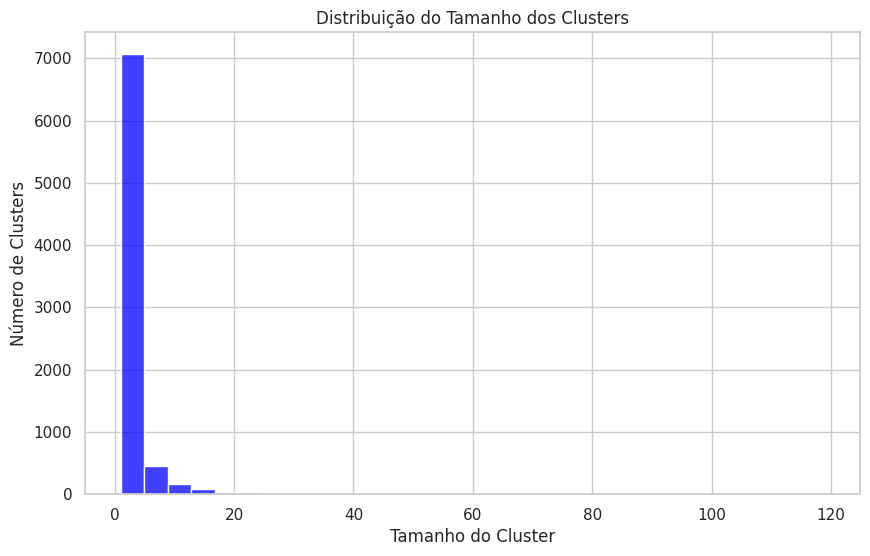

<ipython-input-132-226d30120a1a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_size_counts.index, y=cluster_size_counts.values, palette="viridis")


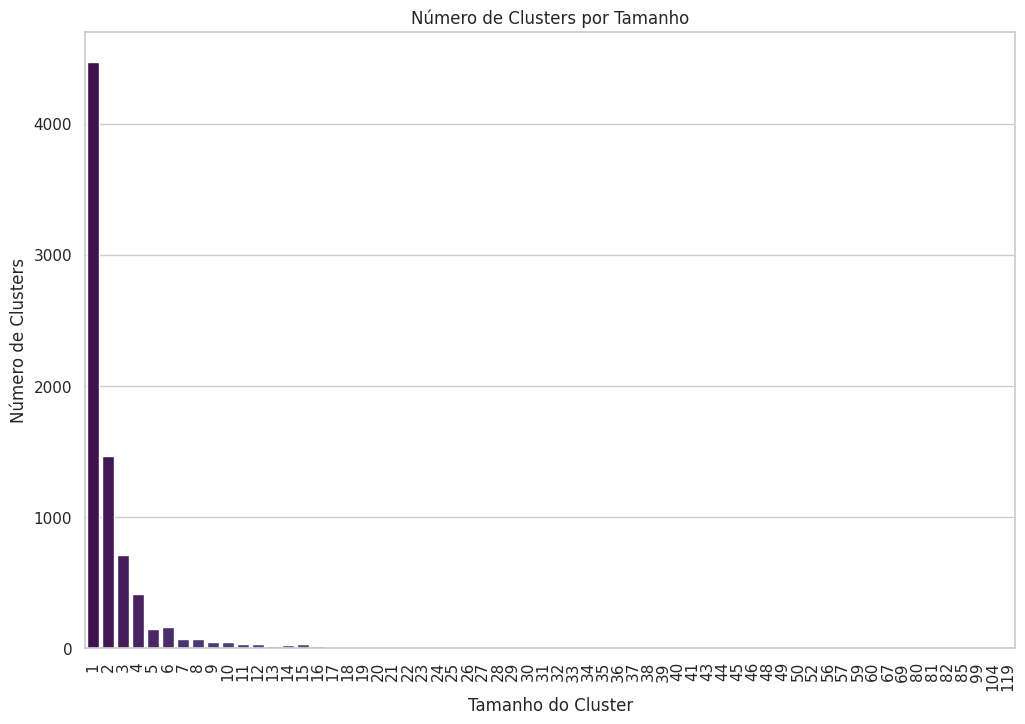

In [ ]:
def analyze_clusters(cluster_file):

    def parse_cd_hit_clstr(cluster_file):
        clusters = {}
        with open(cluster_file, 'r') as file:
            cluster_id = None
            for line in file:
                line = line.strip()
                if line.startswith('>Cluster'):
                    cluster_id = int(line.split()[-1])
                    clusters[cluster_id] = []
                else:
                    sequence_id = line.split('>')[1].split('...')[0]
                    clusters[cluster_id].append(sequence_id)
        return clusters


    clusters = parse_cd_hit_clstr(cluster_file)


    cluster_sizes = [len(seq_ids) for seq_ids in clusters.values()]


    df = pd.DataFrame({'Cluster Size': cluster_sizes})


    sns.set(style="whitegrid")


    plt.figure(figsize=(10, 6))
    sns.histplot(df['Cluster Size'], bins=30, kde=False, color="blue")
    plt.title('Distribuição do Tamanho dos Clusters')
    plt.xlabel('Tamanho do Cluster')
    plt.ylabel('Número de Clusters')
    plt.show()


    plt.figure(figsize=(12, 8))
    cluster_size_counts = df['Cluster Size'].value_counts().sort_index()
    sns.barplot(x=cluster_size_counts.index, y=cluster_size_counts.values, palette="viridis")
    plt.title('Número de Clusters por Tamanho')
    plt.xlabel('Tamanho do Cluster')
    plt.ylabel('Número de Clusters')
    plt.xticks(rotation=90)
    plt.show()


analyze_clusters('/content/clusters.fasta.clstr')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Carregar ou criar o DataFrame df
df = pd.read_csv('/content/clusters.fasta.clstr')

# Verificar os nomes das colunas
print(df.columns)

# Certifique-se de que 'Cluster Size' é o nome correto da coluna
if 'Cluster Size' in df.columns:
    # Gráfico de violino vertical da distribuição do tamanho dos clusters
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=df['Cluster Size'], palette="viridis")
    plt.title('Distribuição do Tamanho dos Clusters')
    plt.xlabel('Tamanho do Cluster')
    plt.ylabel('Densidade')
    plt.show()
else:
    print("A coluna 'Cluster Size' não foi encontrada no DataFrame.")


Index(['>Cluster 0'], dtype='object')
A coluna 'Cluster Size' não foi encontrada no DataFrame.


In [ ]:
df["Function"]= "antibacterian group ESKAPE"

In [ ]:
df.drop(columns="ID",inplace=True)

In [ ]:
df.rename(columns={"Sequência":"Sequence"},inplace=True)

In [ ]:
df.to_csv("/content/AMP.csv")

In [ ]:
df_non_amp = merged_df[merged_df['Function'] == 'non-AMP']

In [ ]:
FINAL=pd.merge(df_non_amp,df, how='outer')

In [ ]:
FINAL

,Unnamed: 0,Sequence,Function
0,3102.0,MSSTQFDHVTVIKKSNVYFGGACISHTVQFEDGTKKTLGVILPTEQ...,non-AMP
1,3103.0,MAIERTLSIVKPDAVSKNHIGEIFARFEKAGLKIVATKMKHLSQAD...,non-AMP
2,3104.0,MQYTLWDIISRVESNGNLKALRFEPEYYQRRMERGDWDNSIIQNIR...,non-AMP
3,3105.0,MKLLHLDSSALGEFSATREIGQAVVQELKKHGPLEVTYRDLHVEPL...,non-AMP
4,3106.0,MNINLTLIGQAIAFAFFVAFCMKFVWPPLINAISERQRKIADGLNA...,non-AMP
...,...,...,...
14544,NaN,VIFKVFWRCKAAFC,antibacterian group ESKAPE
14545,NaN,AVKRAVKRFKVHFRCKAAFC,antibacterian group ESKAPE
14546,NaN,AVNIPFKVHFKVHFRCKAAFC,antibacterian group ESKAPE
14547,NaN,GLLSGVLGAGKKIVAGLSGRA,antibacterian group ESKAPE


In [ ]:

function_counts = FINAL['Function'].value_counts()

function_counts_df = function_counts.reset_index()
function_counts_df.columns = ['Function', 'count']
print(function_counts_df)

                     Function  count
0  antibacterian group ESKAPE   7915
1                     non-AMP   6634


In [ ]:
FINAL.to_csv("/content/FINAL.csv", index=False)